In [2]:
import os
import sys
import glob

import warnings
warnings.filterwarnings('ignore') # Some things we'll be doing throw runtimewarnings that we won't care about. 

from astropy.io import fits
from astropy.wcs import WCS

import astropy.constants as const
import astropy.units as u
from astropy.visualization import astropy_mpl_style

import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

### This is magic for Jupyer Notebooks. 
### Delete if putting into a script!
%matplotlib inline 
#######################################

import imageio 

In [3]:

galaxy = 'HE0045-2145'#'HE0045-2145'#MUSE/HE0150-0344/
cars_data_directory = 'MUSE/'+str(galaxy)+'/'

Make sure that all necessary data files are visible to this notebook: 

In [4]:
image_file = cars_data_directory + str(galaxy)+ '.unbinned.fits'
hdulist = fits.open(image_file)
hdulist.info()

z = 0.021 # The redshift, which I just grabbed from NED. Doesn't need to be too exact for our purposes.  
cz = z * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

Filename: MUSE/HE0045-2145/HE0045-2145.unbinned.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      44   (319, 314, 3682)   float32   
  1  ERROR         1 ImageHDU         9   (319, 314, 3682)   float32   


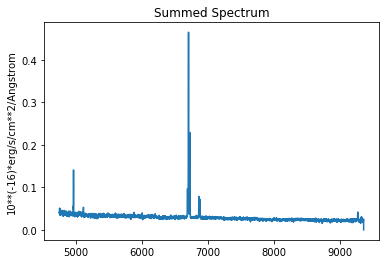

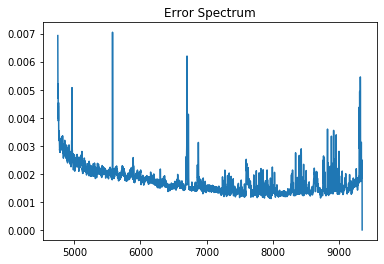

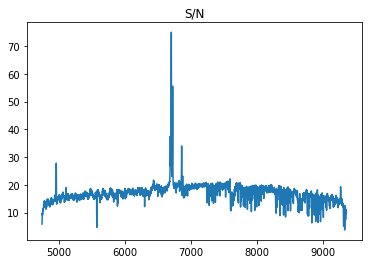

In [75]:
### Try plotting?
#print(hdulist[0].header)
# to get the wavelength axis use:



xs = np.linspace(0,np.shape(hdulist[0].data)[0]-1,np.shape(hdulist[0].data)[0])
wav = [hdulist[0].header['CRVAL3'] + hdulist[0].header['CDELT3']*x for x in xs]
plt.clf()
plt.plot(wav, hdulist[0].data[:,150,150])
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.show()

plt.clf()
plt.plot(wav, hdulist[1].data[:,150,150])
plt.title('Error Spectrum')
plt.show()

plt.clf()
plt.plot(wav, hdulist[0].data[:,150,150]/hdulist[1].data[:,150,150])
plt.title('S/N')
plt.show()

S_N_mean = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
S_N_alt = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
S_N_median = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))

for i in range(np.shape(hdulist[0].data)[1]):
    for j in range(np.shape(hdulist[0].data)[2]):
        flux = hdulist[0].data[:,i,j]
        error = hdulist[1].data[:,i,j]
        
        flux[np.isnan(flux)] = 0
        error[np.isnan(error)] = 0
        S_N_spec = flux/error
        S_N_spec[np.isinf(S_N_spec)] = 0
        S_N_spec[np.isnan(S_N_spec)] = 0
        
        
        
        
        
        '''plt.clf()
        plt.plot(S_N_spec)
        plt.title(str(np.sum(S_N_spec)/len(S_N_spec)))
        plt.show()'''
        
        
        
        '''if np.all(flux)== 0.0:
            continue
        
        
        
        if np.isnan(np.sum(S_N_spec)/len(S_N_spec)) or np.isinf(np.sum(S_N_spec)/len(S_N_spec)):
            plt.clf()
            plt.plot(flux, label='flux')
            plt.plot(error, label='error')
            plt.plot(S_N_spec, label='S_N')
            plt.title(str(np.sum(S_N_spec)/len(S_N_spec)))
            plt.show()
            STOP
            continue'''
            
        '''if np.sum(S_N_spec)/len(S_N_spec) > 50:
            plt.clf()
            plt.plot(S_N_spec)
            plt.title(str(np.sum(S_N_spec)/len(S_N_spec)))
            plt.show()'''
        
        S_N_median[i,j] = np.median(S_N_spec)
        
        S_N_alt[i,j] = np.sum(flux)/np.sum(error)
        
        S_N_mean[i,j] = np.mean(S_N_spec)
        


[41.198208 62.281048 66.07023  ... 41.40942  40.12356   0.      ]


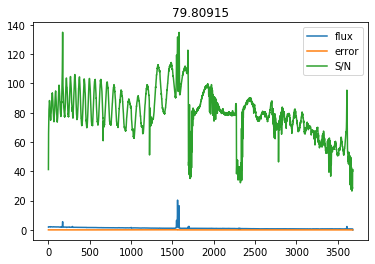

[33.748264 51.852867 54.640102 ... 42.82217  44.746635  0.      ]


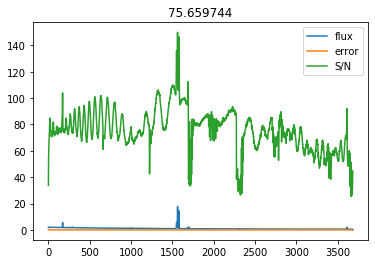

[33.41606  47.036835 50.434593 ... 28.815176 30.94296  14.450678]


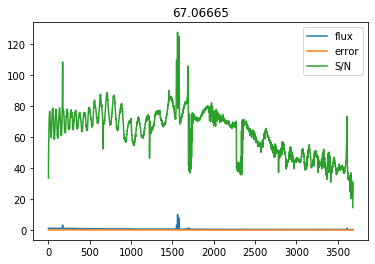

[18.968798 31.817059 33.858208 ... 22.010145 20.517149  0.      ]


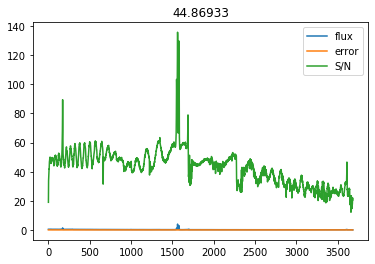

[12.599054  17.225353  18.239283  ... 15.349634  15.627648   7.2165446]


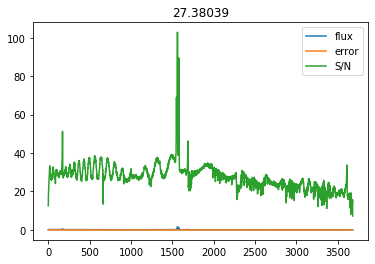

[ 8.891796 13.541991 14.322939 ... 11.785284  9.866455  0.      ]


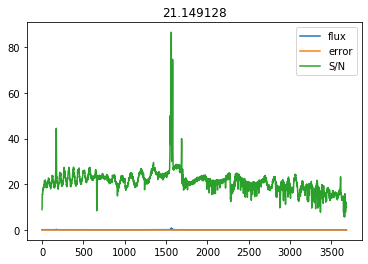

[6.502477 8.707115 9.971529 ... 8.373674 9.019984 0.      ]


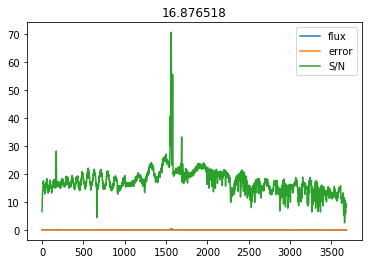

[5.8486037 8.616841  9.707298  ... 7.6723833 8.2783985 0.       ]


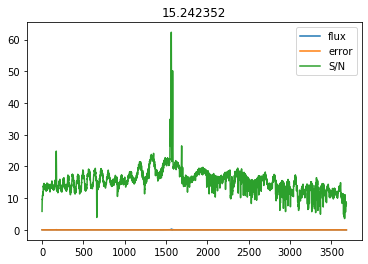

[4.907861  7.718403  8.219542  ... 7.8407397 6.685394  0.       ]


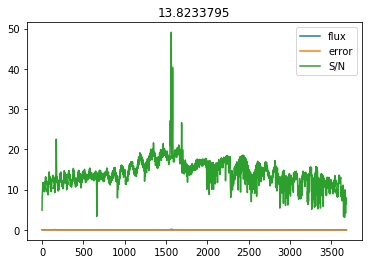

[4.888766  6.2447405 6.8802514 ... 7.3842325 6.9291787 0.       ]


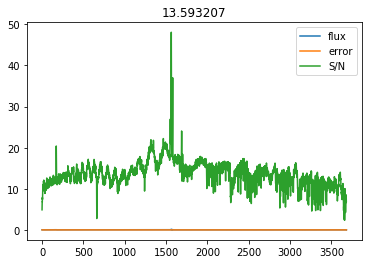

[32.326946 51.12311  53.12692  ... 37.40146  29.014277  0.      ]


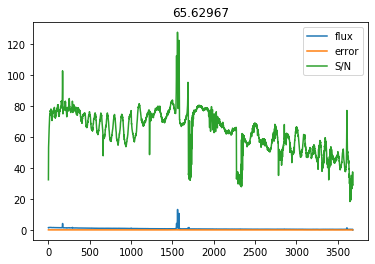

[26.751114 44.268845 45.21693  ... 38.966583 31.608034  0.      ]


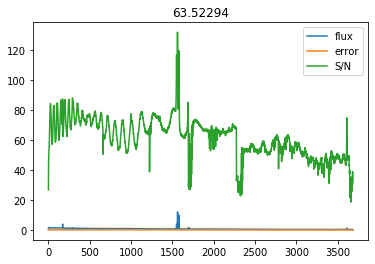

[28.810144 39.74533  41.336433 ... 28.077574 22.080833 12.608346]


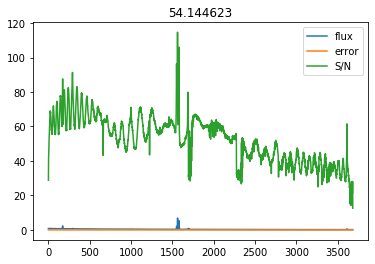

[16.069698 26.610472 27.195736 ... 24.499273 17.502499  0.      ]


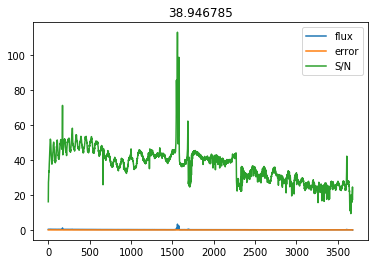

[11.410093  14.811041  15.259735  ... 16.9242    13.331104   7.9470444]


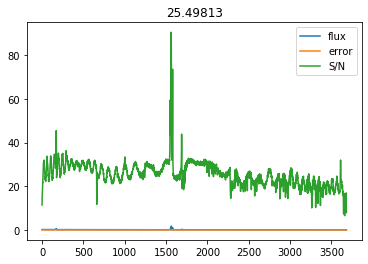

[ 7.5656686 11.413308  10.294167  ... 13.886741   9.139354   0.       ]


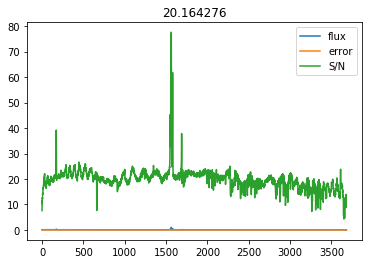

[ 6.077616   7.6909466  7.585674  ... 11.009082   7.0844865  0.       ]


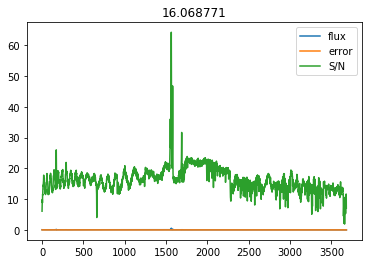

[ 4.5152655  7.277044   8.428197  ... 11.779306   8.358781   0.       ]


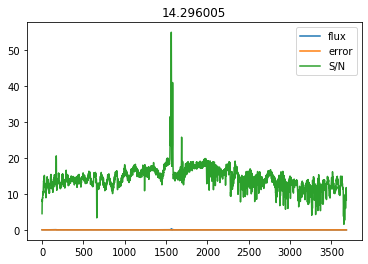

[ 2.6851954  5.8186626  6.154018  ... 10.244698   7.0116544  0.       ]


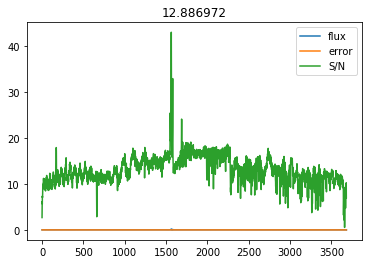

[4.4750977 5.151098  5.6032333 ... 8.789524  6.0701466 0.       ]


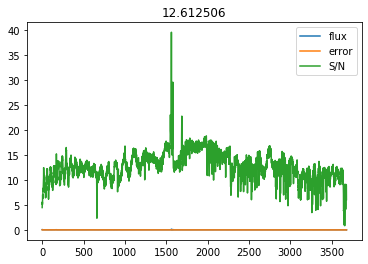

[24.962675 39.209915 41.846825 ... 26.11389  21.49489   9.218186]


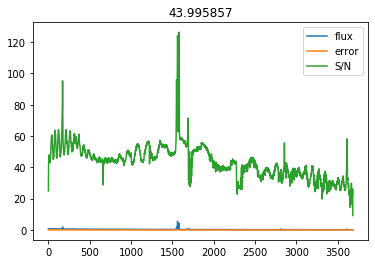

[22.039919 33.382465 35.40315  ... 24.933348 24.150347 11.254134]


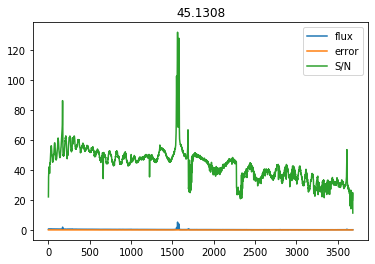

[23.79646  33.258186 35.26134  ... 18.859253 18.673203 12.397254]


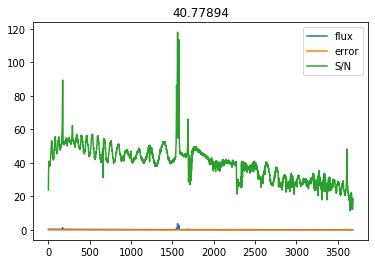

[15.988053  24.676517  24.252033  ... 17.989017  16.662767   9.1748905]


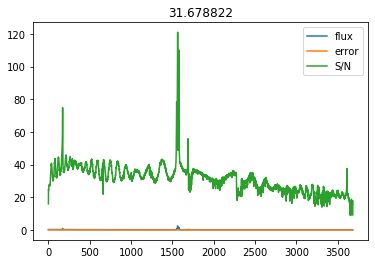

[11.238865  15.425913  16.63414   ... 13.940508  13.776055   6.6666703]


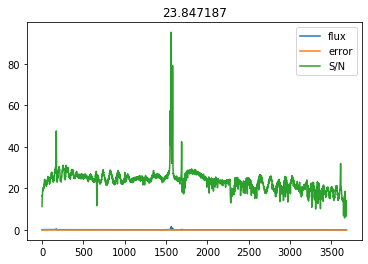

[ 7.7696047 11.480162  12.055624  ... 11.8526745  9.557141   4.710579 ]


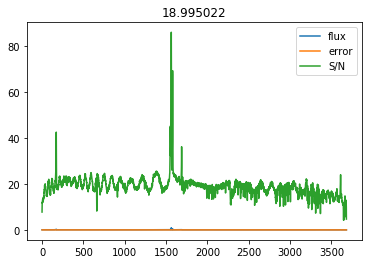

[5.7939186 8.605953  8.640301  ... 9.394686  7.502115  3.636519 ]


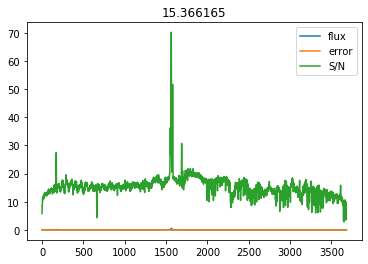

[4.869468  7.4519653 7.6676564 ... 8.745804  7.6236553 4.7138305]


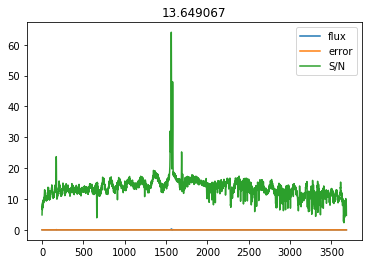

[4.2665477 7.316633  7.9288926 ... 7.762329  7.5572834 4.1410275]


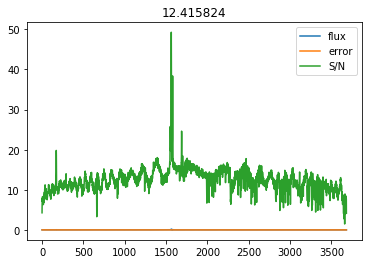

[3.4928164 5.609834  5.2824473 ... 7.735741  7.3187313 3.7863958]


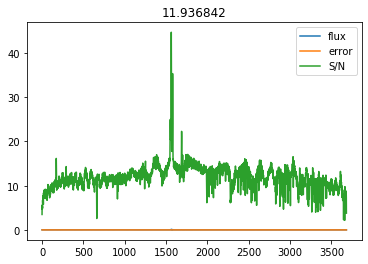

[13.191372 20.323162 21.12826  ... 19.496613 14.761327  0.      ]


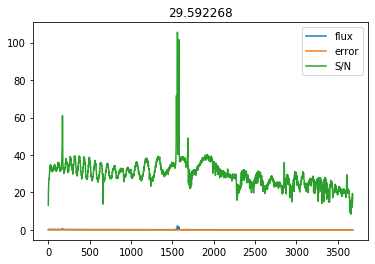

[12.071235 19.277779 19.972944 ... 17.944386 13.846106  9.241323]


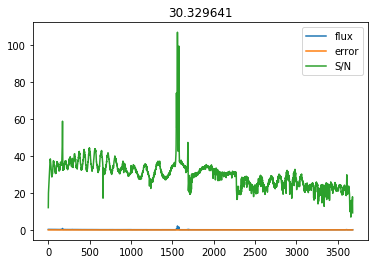

[14.153878  19.412664  19.934372  ... 15.439852  13.344436   7.6738706]


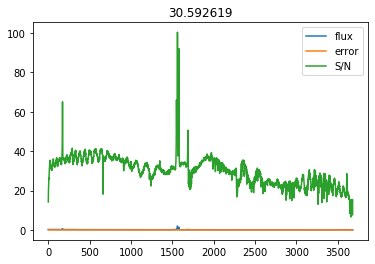

[10.114528 15.904685 15.606411 ... 16.277246 13.388452  8.534451]


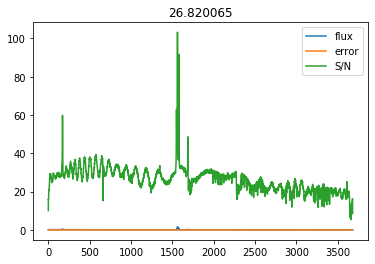

[ 9.262562 11.350436 12.156606 ... 14.212302 11.707744  9.799997]


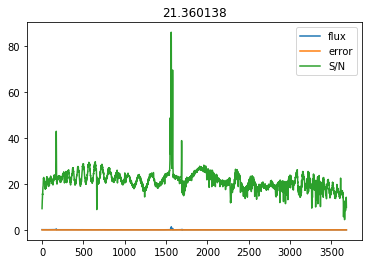

[ 5.3614492  8.794622   9.603109  ... 11.181679   7.592072   6.425621 ]


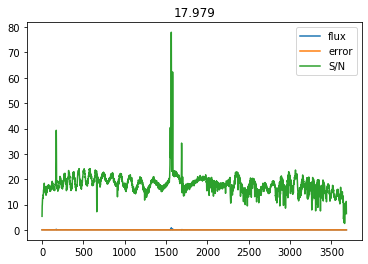

[4.593729  6.228934  7.780732  ... 9.421643  6.960757  5.1355042]


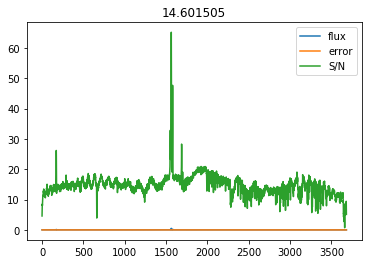

[3.982995  5.6909103 7.033033  ... 9.2609    6.4673    4.613152 ]


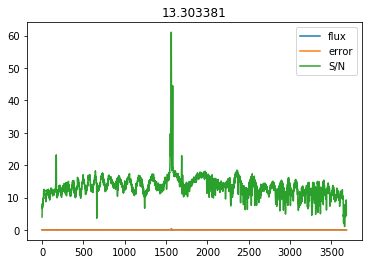

[4.4452386 6.3785934 5.978341  ... 7.5846686 5.951283  4.3158584]


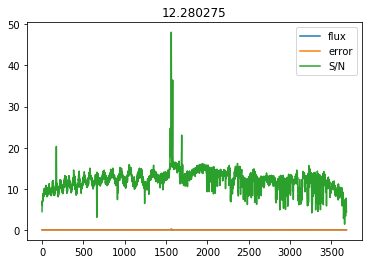

[3.479483  5.1330132 3.926743  ... 8.116113  5.7493825 4.3460655]


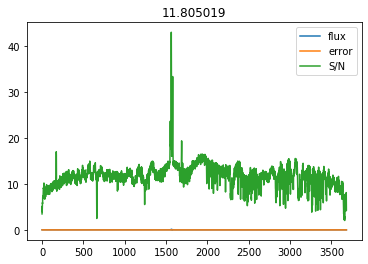

[11.631105 14.972719 15.767344 ... 16.198828 12.18097   0.      ]


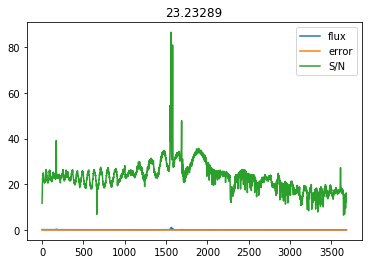

[12.140821  14.9306555 16.206802  ... 14.286692  11.5704775  0.       ]


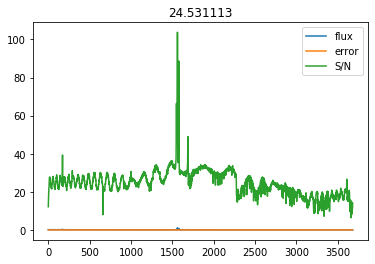

[13.780599 17.497335 18.635815 ... 13.381138 12.565191  6.336099]


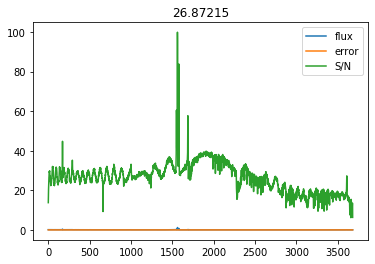

[10.734621 15.064704 15.921362 ... 15.465626 12.718254  0.      ]


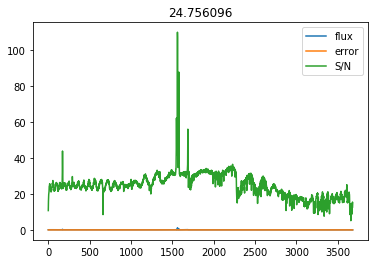

[ 9.227072 10.962576 11.719437 ... 13.994343 12.341683  7.197349]


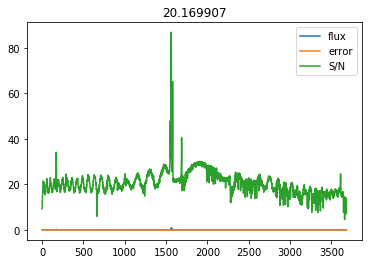

[ 8.041219 10.370578 10.587861 ... 11.144138 10.079779  0.      ]


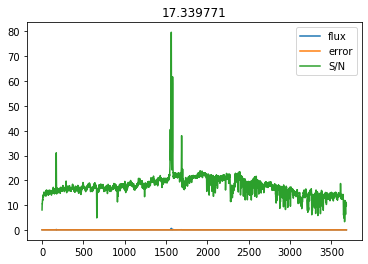

[7.0936937 7.9949017 7.9662714 ... 8.113182  8.156422  0.       ]


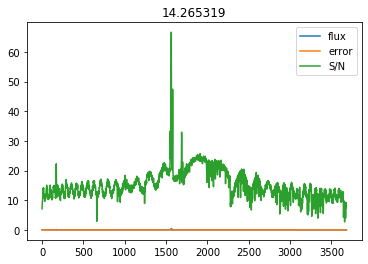

[4.789139  6.5656443 6.090982  ... 9.147423  7.7269683 0.       ]


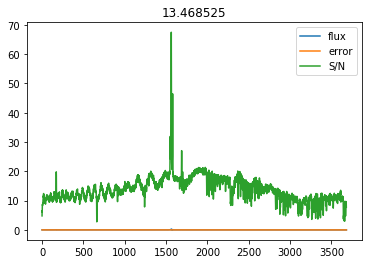

[4.76924   6.8438673 5.860252  ... 6.389954  7.3632455 0.       ]


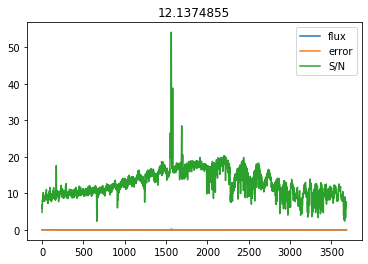

[3.0771754 5.2057614 4.261258  ... 7.959968  6.990737  0.       ]


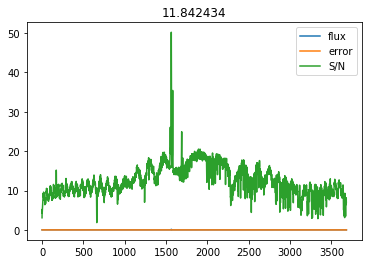

[ 7.5406733 11.053254  11.424668  ... 15.1434965 12.495614   0.       ]


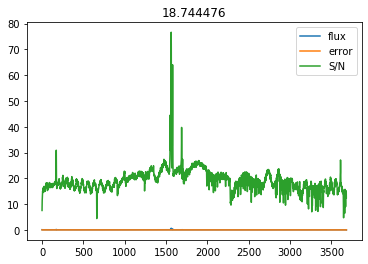

[ 7.8602996 11.789661  11.845647  ... 14.19264   12.291511   0.       ]


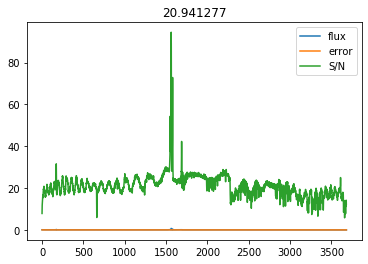

[ 9.45316  13.020598 14.017245 ... 14.003988 11.541572  5.871283]


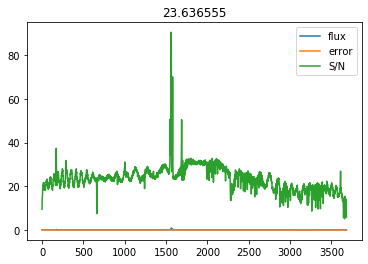

[ 7.674087 11.799402 12.700616 ... 15.633538 11.715324  0.      ]


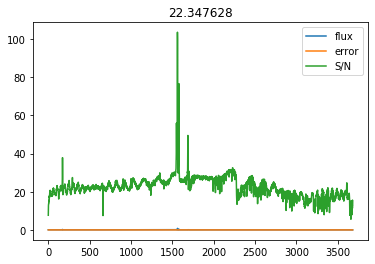

[ 6.6780457 10.193967  10.372575  ... 11.489078  11.02212    5.886822 ]


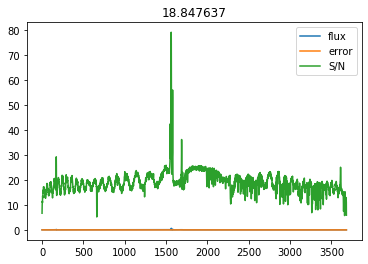

[ 5.8236966  8.479202   8.516457  ... 10.82308   10.258899   0.       ]


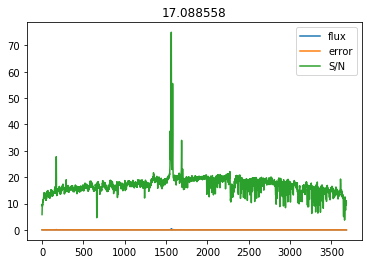

[5.775425  6.4149437 6.2028866 ... 8.778511  7.1074553 0.       ]


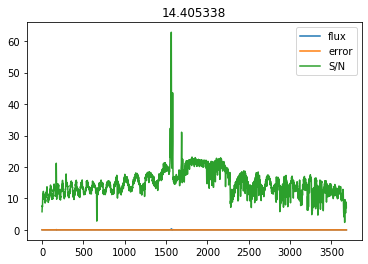

[3.704894  6.3365693 5.6786537 ... 9.655729  8.094639  0.       ]


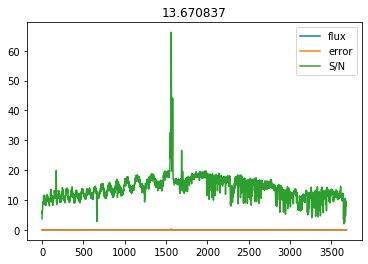

[4.3979635 6.43906   5.7311606 ... 7.226343  6.996252  0.       ]


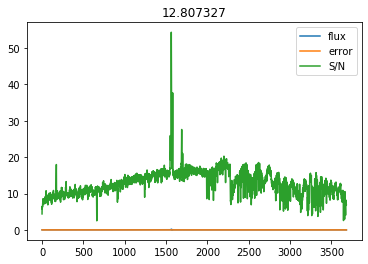

[2.9527345 4.8443456 4.6307206 ... 7.9154987 7.87026   0.       ]


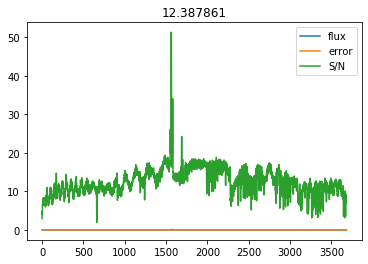

[ 4.6889505  8.37043    8.614573  ... 12.694626   9.858889   0.       ]


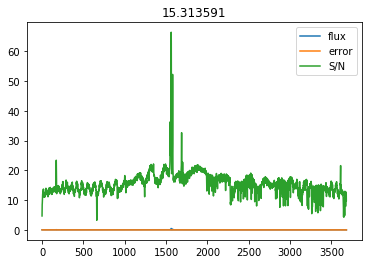

[ 5.364201  9.497835  9.451563 ... 11.822066  9.971322  5.440903]


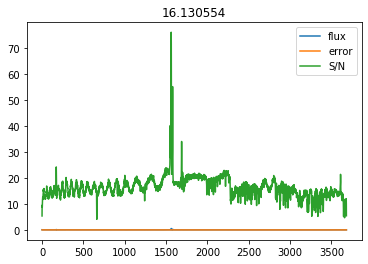

[ 5.6307106 10.193792  11.088321  ... 12.068423   8.367563   3.8335133]


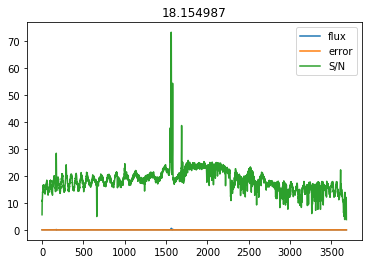

[ 4.1700597  9.09207    9.942203  ... 13.42597   10.70791    0.       ]


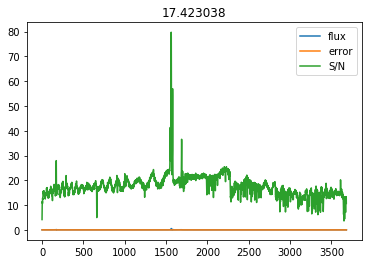

[ 5.4167275  8.15515    7.436189  ... 10.993649   8.89126    6.0792856]


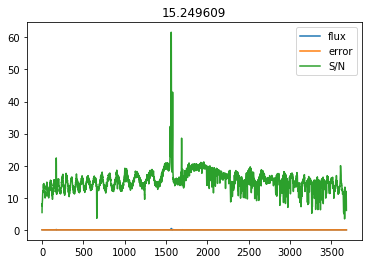

[ 3.7787547  7.283007   6.703397  ... 10.039254   7.3413496  0.       ]


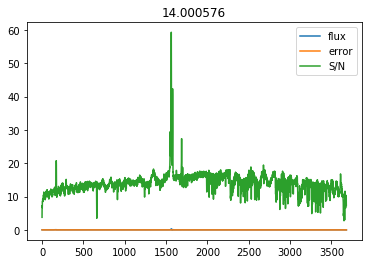

[2.7416205 6.4855785 6.350317  ... 7.391684  6.0854635 0.       ]


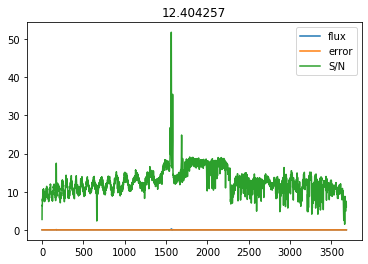

[2.834309  6.0679917 5.158307  ... 9.883061  7.5084357 0.       ]


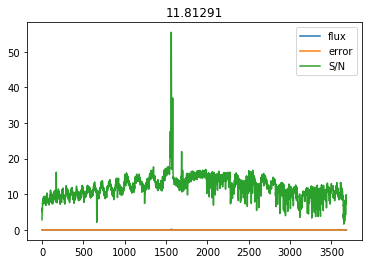

[3.9153318 4.8809342 5.2072926 ... 7.3806744 4.6310625 0.       ]


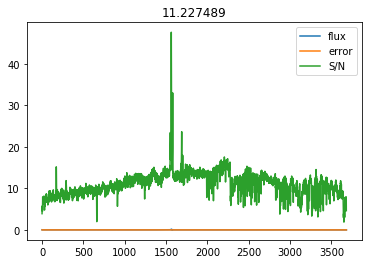

[3.8585265 4.6476083 5.368016  ... 7.6086864 6.24204   0.       ]


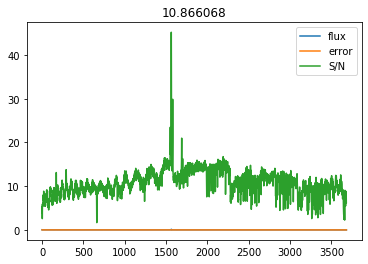

[ 5.4217896  8.857666   8.904611  ... 12.029197   9.2566185  0.       ]


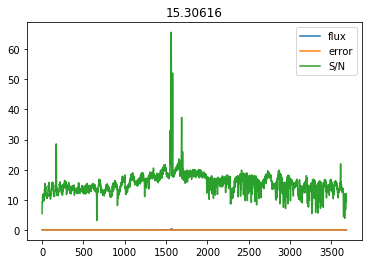

[ 6.962055   9.50399   10.424428  ... 10.184405   9.692088   6.2353215]


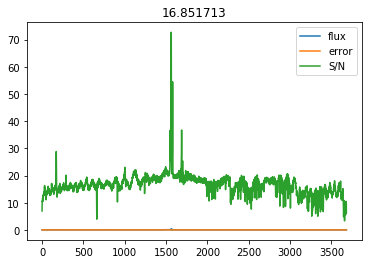

[ 7.9619365 12.294824  11.7965145 ... 10.066055   9.247153   5.706332 ]


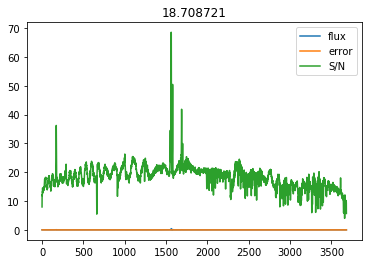

[ 7.505962  11.106684  10.9261465 ... 10.741007   9.382702   0.       ]


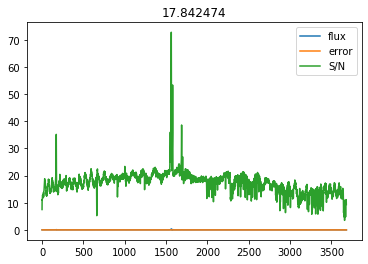

[ 4.956727   8.002029   8.8778305 ... 10.607408   8.826011   6.213881 ]


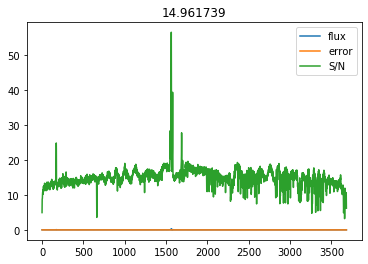

[ 4.195836   7.2858024  8.3164835 ... 10.126124   7.579399   0.       ]


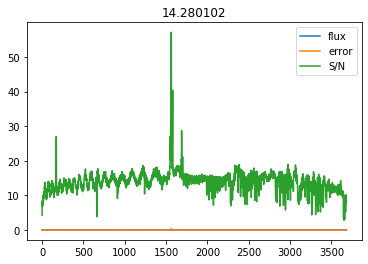

[3.49448   6.5625606 6.974056  ... 7.2662916 6.8667154 0.       ]


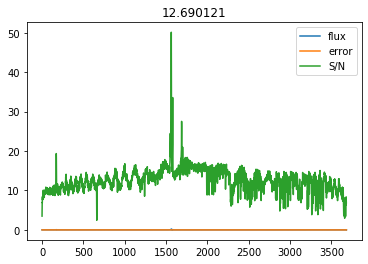

[3.768419  5.5770793 5.2578073 ... 8.532029  6.2687707 0.       ]


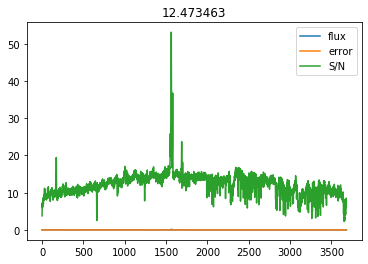

[3.6807663 5.712359  6.387602  ... 5.4804726 5.649769  0.       ]


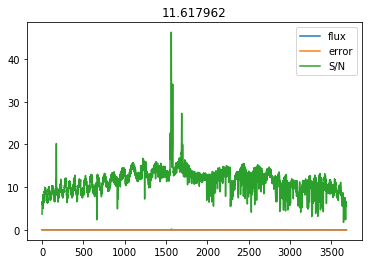

[3.6317215 5.0859103 4.7230654 ... 6.742491  5.048328  0.       ]


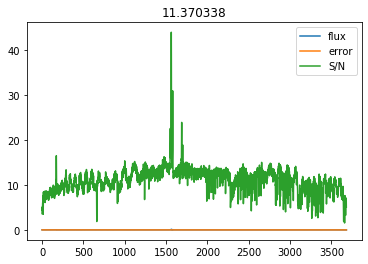

[ 5.248342   7.8388886  6.779323  ... 11.560159   9.0425     4.049284 ]


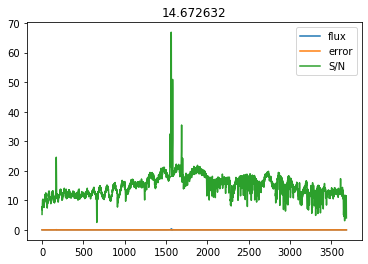

[ 5.49575    7.573781   7.4364467 ... 11.076465  10.613473   4.1057377]


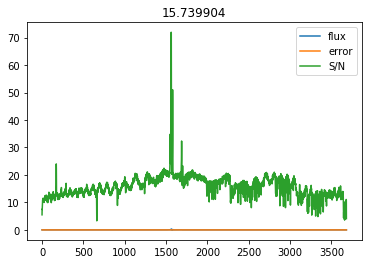

[ 6.2126637  9.151926   8.515648  ... 10.176541   9.516254   6.4087095]


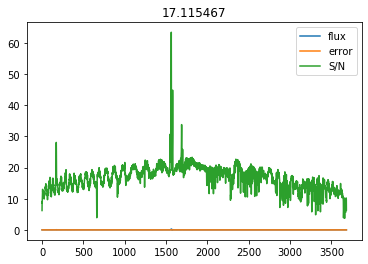

[5.1700683 8.06068   8.403948  ... 9.98223   8.467318  4.104318 ]


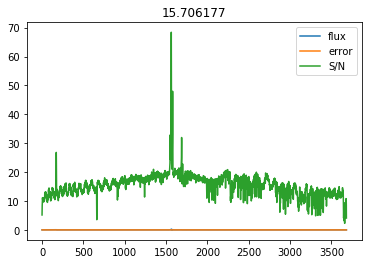

[4.8838453 5.460274  6.42426   ... 9.881003  7.7871103 2.5338373]


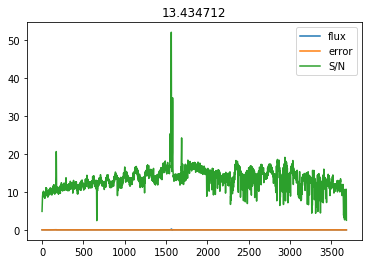

[4.292974  5.4895363 6.4136753 ... 8.245032  7.383055  2.955981 ]


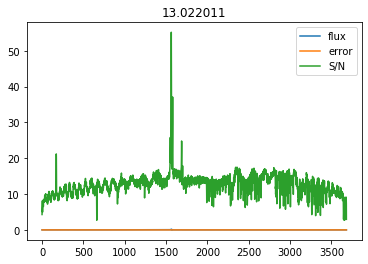

[4.121992  5.3794646 6.0711107 ... 6.2988567 6.388877  2.9603944]


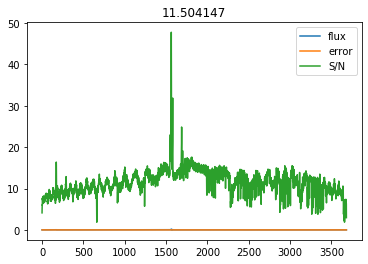

[4.4033704 5.822675  5.5334883 ... 7.4364347 5.347343  0.       ]


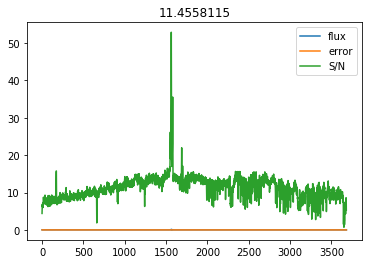

[2.27194   4.8104234 5.850342  ... 5.4123025 5.323463  0.       ]


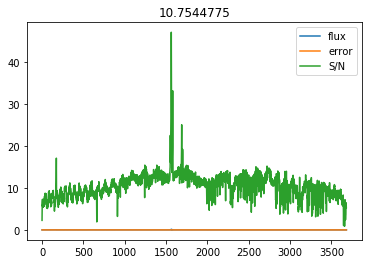

[2.654582  3.5865731 3.9417124 ... 7.3960624 4.9675303 2.0554814]


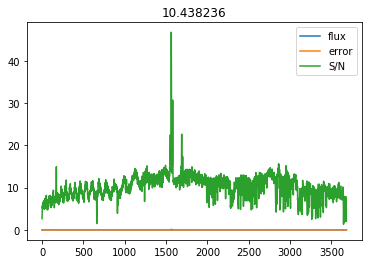

[ 5.675444   6.5226154  7.373254  ... 10.7692     8.695028   4.0215297]


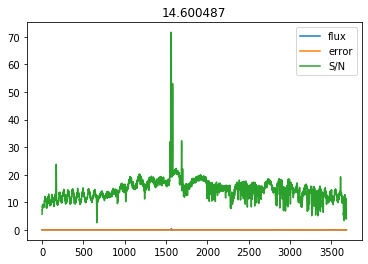

[5.8997374 7.0993366 7.303719  ... 9.946464  8.42567   3.9970052]


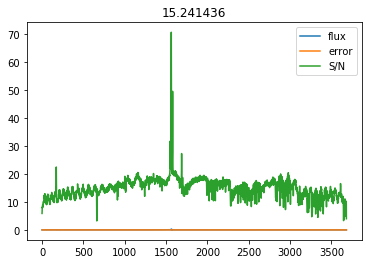

[6.845388  8.351468  8.620275  ... 8.480788  7.8003144 5.558049 ]


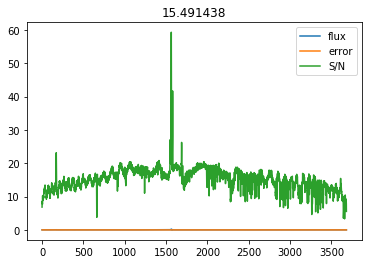

[7.028978  7.9803743 7.807631  ... 8.747335  7.700778  4.0796103]


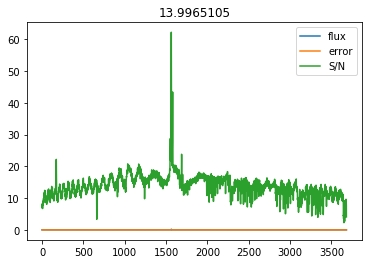

[4.756436  5.7138863 5.722241  ... 7.816462  5.5597076 1.660222 ]


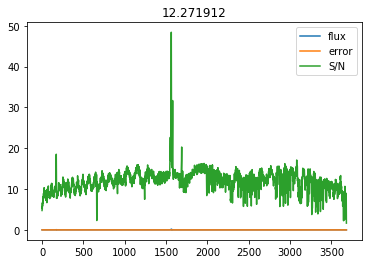

[5.934368  5.70433   5.543475  ... 6.9121375 5.7213206 2.9637165]


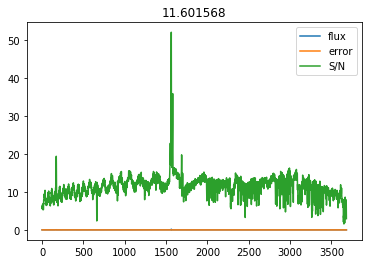

[3.9004192 4.804927  4.5233555 ... 5.9675264 3.7397552 3.2096283]


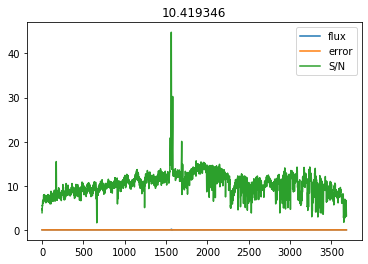

[4.872254  4.726473  4.7446256 ... 6.8741665 5.0306535 1.8969581]


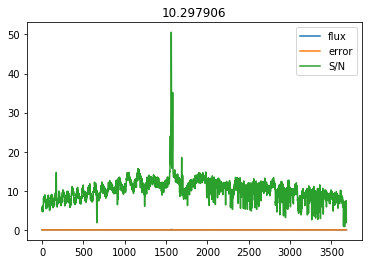

[2.9782047 4.3518043 4.9635596 ... 4.085019  2.6819274 1.3025848]


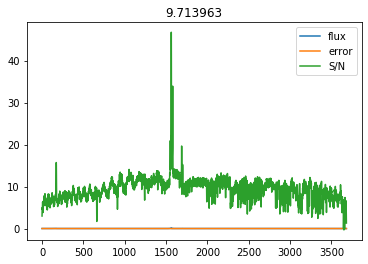

[2.5760646 3.6281025 3.4492226 ... 5.9922843 4.654879  3.2408323]


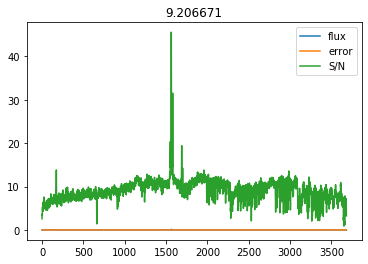

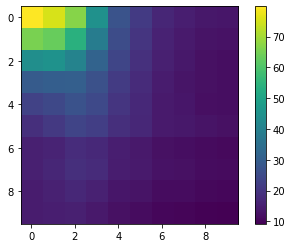

In [58]:
central = np.zeros((10,10))

for i in range(10):
    for j in range(10):

        flux = hdulist[0].data[:,155-i,155-j]
        error = hdulist[1].data[:,155-i,155-j]


        flux[np.isnan(flux)] = 0
        error[np.isnan(error)] = 0
        S_N_spec = flux/error
        S_N_spec[np.isinf(S_N_spec)] = 0
        S_N_spec[np.isnan(S_N_spec)] = 0

        print(S_N_spec)


        plt.plot(flux, label='flux')
        plt.plot(error, label='error')
        plt.plot(flux/error, label='S/N')
        plt.title(str(np.median(S_N_spec)))
        plt.legend()
        plt.show()
        
        central[i,j] = np.median(S_N_spec)
        
plt.clf()
plt.imshow(central)
plt.colorbar()
plt.show()

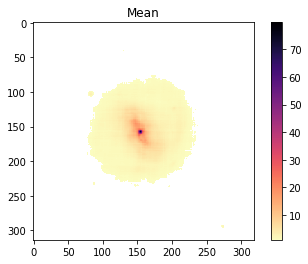

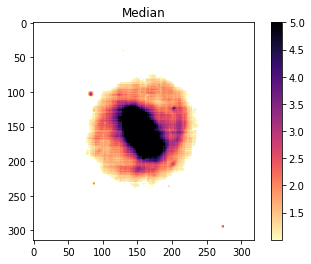

NameError: name 'STOP' is not defined

In [84]:
maskval = 1

mean = np.flipud(np.ma.masked_where(S_N_mean < maskval, S_N_mean))
median = np.flipud(np.ma.masked_where(S_N_median < maskval, S_N_median))
alternate = np.flipud(np.ma.masked_where(S_N_alt < maskval, S_N_alt))

plt.clf()
plt.imshow(mean, cmap='magma_r')
plt.colorbar()
plt.title('Mean')
plt.show()



plt.clf()
plt.imshow(median, cmap='magma_r', vmax=5)
plt.colorbar()
plt.title('Median')
plt.show()

STOP

plt.clf()
plt.imshow(alternate, cmap='magma_r')
plt.colorbar()
plt.title('Alternate')
plt.show()

plt.clf()
plt.imshow(alternate - mean, cmap='magma_r')
plt.colorbar()
plt.title('Alternate - Mean')
plt.show()

plt.clf()
plt.imshow(median - mean, cmap='magma_r')
plt.colorbar()
plt.title('Median - Mean')
plt.show()




In [5]:
print(hdulist[0].header['CRVAL1'])
#h_spec['CRVAL1'] + np.arange(0,h_spec['CD1_1']*(h_spec['NAXIS1']),h_spec['CD1_1'])

11.922079


In [8]:
from ppxf_doubleG import ppxf_indiv
pix1 = 200
pix2 = 150


len1 = 10
len2 = 10

vel1 = np.zeros((len1, len2))
vel2 = np.zeros((len1, len2))
sig1 = np.zeros((len1, len2))
sig2 = np.zeros((len1, len2))
chi = np.zeros((len1, len2))


for i in range(len1):
    for j in range(len2):
        print(i,j)
        pix1 = int(150 + len1/2 - i)
        pix2 = int(150 + len1/2 - j)
        out_ppxf = ppxf_indiv('HE0045',z,spec_hdu=hdulist, galaxy_lin=hdulist[0].data[:,pix1,pix2],
                  error_lin=hdulist[1].data[:,pix1,pix2],
                   reflines='reflines_tex.dat')# plotfile='ppxf_fit/HE0045_'+str(pix1)+'_'+str(pix2)+'.pdf',
        if out_ppxf[1] > out_ppxf[3]:
            #then comp 1 is vel1
            vel1[i,j] = out_ppxf[0]
            sig1[i,j] = out_ppxf[1]
            vel2[i,j] = out_ppxf[2]
            sig2[i,j] = out_ppxf[3]
            chi[i,j] = out_ppxf[4]
        else:
            vel2[i,j] = out_ppxf[0]
            sig2[i,j] = out_ppxf[1]
            vel1[i,j] = out_ppxf[2]
            sig1[i,j] = out_ppxf[3]
            chi[i,j] = out_ppxf[4]

#return zfit_stars, sigma_stars, sigma_blr, wave, pp.bestfit
print(out_ppxf)

0 0
FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:        93        49
 comp.  1:        -0       189
chi2/DOF: 6.254
method = capfit; Jac calls: 10; Func calls: 82; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
      3.45      96.9      4.85      8.62     0.519     0.547      87.8      2.16      68.4      4.42      3.58     0.519     0.228      41.7
0 1
FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:       100        52
 comp.  1:        -0       191
chi2/DOF: 5.812
method = capfit; Jac calls: 10; Func calls: 85; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  14 / 14
Templates weights:
     

 Best Fit:       Vel     sigma
 comp.  0:        -0       199
 comp.  1:       129        52
chi2/DOF: 1.115
method = capfit; Jac calls: 10; Func calls: 82; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.154       2.9     0.305     0.354    0.0259         0      1.55     0.244      6.08     0.915     0.863    0.0204    0.0382      3.33
1 6
FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:       141        55
 comp.  1:         1       197
chi2/DOF: 1.02
method = capfit; Jac calls: 14; Func calls: 114; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
      0.13      3.42     0.609     0.518    0.0152    0.0299      1.83     0.101      1.57    0.0937     0.146    0.0269         0     0.863
1 7
FWHM 2.9429491974972795
Emission lines incl

 Best Fit:       Vel     sigma
 comp.  0:       100        44
 comp.  1:        -0       193
chi2/DOF: 1.675
method = capfit; Jac calls: 8; Func calls: 66; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.479      10.3      1.18      1.52    0.0563    0.0717      8.79     0.543      9.46      1.06      0.97     0.106    0.0192      5.41
3 1
FWHM 2.942949415284199
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:         0       194
 comp.  1:       106        47
chi2/DOF: 1.489
method = capfit; Jac calls: 13; Func calls: 109; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.544      9.74     0.833     0.991     0.151    0.0356      5.46     0.509      10.9      1.41      1.75     0.046    0.0593      9.04
3 2
FWHM 2.942949415284199
Emission lines includ

 Best Fit:       Vel     sigma
 comp.  0:         7       210
 comp.  1:       130        46
chi2/DOF: 0.9892
method = capfit; Jac calls: 8; Func calls: 66; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.064      1.56     0.157     0.182   0.00981         0     0.794     0.157      3.75      0.53     0.471    0.0255    0.0278      1.76
4 6
FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:        25       213
 comp.  1:       137        44
chi2/DOF: 0.9643
method = capfit; Jac calls: 12; Func calls: 101; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  12 / 14
Templates weights:
    0.0842      1.06     0.064    0.0574    0.0859         0     0.535     0.202      2.23     0.244     0.195         0    0.0287      1.01
4 7
FWHM 2.9429491974972795
Emission lines in

 Best Fit:       Vel     sigma
 comp.  0:       122        37
 comp.  1:        -0       176
chi2/DOF: 1.102
method = capfit; Jac calls: 9; Func calls: 74; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.072      2.44     0.485     0.465   0.00981    0.0318       1.5     0.091      1.64     0.178    0.0957    0.0269         0     0.758
6 1
FWHM 2.942949415284199
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:         0       175
 comp.  1:       129        38
chi2/DOF: 1.104
method = capfit; Jac calls: 13; Func calls: 107; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.112     0.891    0.0613    0.0824    0.0428  0.000391     0.382     0.133      1.45     0.227     0.187   0.00948    0.0152     0.785
6 2
FWHM 2.942949415284199
Emission lines includ

 Best Fit:       Vel     sigma
 comp.  0:         0       198
 comp.  1:       139        35
chi2/DOF: 1.05
method = capfit; Jac calls: 10; Func calls: 82; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  14 / 14
Templates weights:
    0.0341     0.913    0.0934    0.0821    0.0214    0.0102     0.404    0.0559       1.3     0.175      0.13   0.00662    0.0143     0.539
7 6
FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:       143        30
 comp.  1:         4       204
chi2/DOF: 0.9483
method = capfit; Jac calls: 16; Func calls: 135; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
    0.0488      1.14     0.184     0.169   0.00209    0.0122     0.494    0.0376     0.862     0.129    0.0972    0.0189    0.0211     0.381
7 7
FWHM 2.9429491974972795
Emission lines inc

 Best Fit:       Vel     sigma
 comp.  0:       123        30
 comp.  1:        35       155
chi2/DOF: 1.145
method = capfit; Jac calls: 8; Func calls: 67; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  12 / 14
Templates weights:
    0.0581      2.14     0.232     0.195  0.000579   0.00115     0.779    0.0181     0.486     0.054    0.0217     0.022    0.0352     0.239
9 1
FWHM 2.942949415284199
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:        34       142
 comp.  1:       130        33
chi2/DOF: 1.053
method = capfit; Jac calls: 11; Func calls: 101; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
     0.758     0.233   0.00902   0.00985     0.145  0.000129     0.103      1.26     0.526     0.067    0.0469    0.0426    0.0112     0.201
9 2
FWHM 2.942949415284199
Emission lines includ

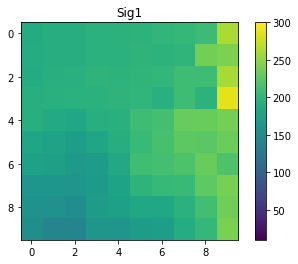

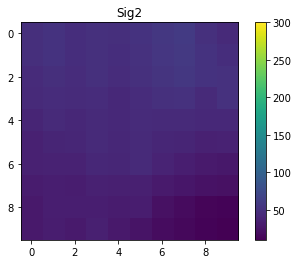

In [9]:
plt.clf()
plt.imshow(sig1, vmin=10, vmax=300)
plt.title('Sig1')
plt.colorbar()
plt.show()
plt.clf()
plt.imshow(sig2, vmin=10, vmax=300)
plt.title('Sig2')
plt.colorbar()
plt.show()

In [7]:
#136 144
pix1 = 136
pix2 = 144
out_ppxf = ppxf_indiv('HE0045',z,spec_hdu=hdulist, galaxy_lin=hdulist[0].data[:,pix2,pix1],
                  error_lin=hdulist[1].data[:,pix1,pix2],plotfile='ppxf_fit/HE0045_'+str(pix1)+'_'+str(pix2)+'.pdf',
                   reflines='reflines_tex.dat')

FWHM 2.9429491974972795
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
nNLines 7 bl 7
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:        91       157
 comp.  1:        91       158
chi2/DOF: 0.7515
method = capfit; Jac calls: 6; Func calls: 55; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  7 / 14
Templates weights:
         0    0.0764    0.0251    0.0183         0         0    0.0797   0.00795         0         0         0    0.0103    0.0311         0


In [1]:
import matplotlib
plt.clf()

plt.plot(wav, np.sum(hdulist[0].data, axis=(1,2)))
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.clf()
#xs, ys = np.histogram(np.sum(hdulist[0].data, axis=(1,2)), bins = wav)
plt.step(wav, np.sum(hdulist[0].data, axis=(1,2)), color='black')
#plt.scatter(ys[:-1],xs, color='black')
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
#plt.xlim([6650, 6750])
plt.show()

plt.clf()

plt.step(wav, hdulist[0].data[:,150,150], color='black')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.imshow(np.sum(hdulist[0].data, axis=0), norm=matplotlib.colors.LogNorm())
plt.show()



NameError: name 'plt' is not defined

In [ ]:
# Fit a Gauss to this:
import scipy

def one_gauss_fit(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))
def two_gauss_fit(x, a, mu, sigma, a2, mu2, sigma2):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + a2*np.exp(-(x-mu2)**2/(2*sigma2**2)) 
def linefit(x,m,b):
 
    return [m*i + b for i in x]


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]




def fit_gaussians_aik(wav, data, error, pix_x, pix_y , guess_mu):

    print(np.min(data))

    

    # first, fit a line:
    print(np.shape(wav), np.shape(data))
    poptline, pcov = scipy.optimize.curve_fit(linefit, wav, data, p0=[0.1,np.min(data)])
    print(poptline)
    line = linefit(wav, *poptline)
    #line = [line_y for x in wav[idx_1:idx_2]]
    
    guess = [np.max(data), guess_mu, 5]
    popt, pcov = scipy.optimize.curve_fit(one_gauss_fit, wav,data, p0=guess)
    print('best fit for 1 gauss', popt)
    gauss_1 = one_gauss_fit(wav, *popt)

    # Now fit 2 Gauss
    guess2 = [popt[0]/2, popt[1], popt[2], popt[0]/2, popt[1]-2, popt[2]]
    try:
        popt2, pcov2 = scipy.optimize.curve_fit(two_gauss_fit, wav,data, p0=guess2)
    except:
        plt.clf()
        plt.step(wav, data)
        plt.show()
        return 0, 0
    
    gauss_2_1 = one_gauss_fit(wav, *[popt2[0], popt2[1], popt2[2]])
    gauss_2_2 = one_gauss_fit(wav, *[popt2[3], popt2[4], popt2[5]])
    gauss_2 = two_gauss_fit(wav, *popt2)

    chi_line = np.sum(abs(line - data)**2/error**2)
    chi_1 = np.sum(abs(gauss_1 - data)**2/error**2)
    chi_2 = np.sum(abs(gauss_2 - data)**2/error**2)

    n = idx_2 - idx_1

    k = 2
    aik_line = chi_line + 2*k + 2*k*(k+1)/(n - k - 1)
    
    k = 3
    aik_1 = chi_1 + 2*k + 2*k*(k+1)/(n - k - 1)

    k = 6
    aik_2 = chi_2 + 2*k + 2*k*(k+1)/(n - k - 1)
    #AIC = chi +2k
    #AIC + 2k(k + 1)/(n − k − 1)

    plt.clf()
    plt.plot(wav, line, color='blue')
    plt.step(wav, data, color='black', where='mid', label='Data')
    plt.scatter(wav, data, color='black', s=5)
    plt.step(wav, one_gauss_fit(wav, *popt), color='red', label='1 Gauss', where='mid')
    #plt.step(wav[idx_1:idx_2], two_gauss_fit(wav[idx_1:idx_2], *popt2), color='orange', label='2 Gauss')#, where='mid')
    plt.step(wav, gauss_2_1, color='orange', where='mid', label='2 Gauss')
    plt.step(wav, gauss_2_2, color='orange', where='mid')


    plt.title('Individual Spaxels')
    plt.ylabel(str(hdulist[0].header['BUNIT']))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
    plt.annotate('$AIK_1$ = '+str(round(aik_1,1)), xy=(0.05, 0.95), xycoords='axes fraction', color='red')
    plt.annotate('$AIK_2$ = '+str(round(aik_2,1)), xy=(0.05, 0.9), xycoords='axes fraction', color='orange')
    
    if aik_line < aik_1 and aik_line < aik_2:
        plt.annotate('Line is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
        fit = 0
        fit_param = poptline
    else:
        if aik_2 < aik_1:
            plt.annotate('Two is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 2
            fit_param = popt2
            
        else:
            plt.annotate('One is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 1
            fit_param = popt
           

    #plt.xlim([6650, 6750])
    plt.show()

    
    #data, error, gauss_1, gauss_2, gauss_2_1, gauss_2_2, aik_line, aik_1, aik_2,
    return fit, fit_param

start_x = 6712
end_x = 6732
mu = 6723

idx_1 = find_nearest(wav, start_x)[0]
idx_2 = find_nearest(wav, end_x)[0]

wavecut = wav[idx_1:idx_2]

fit_n = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
vel_narrow = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
vel_broad = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
sig_narrow = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
sig_broad = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))

for j in range(len(hdulist[0].data[1])):
    for i in range(len(hdulist[0].data[2])):
        # For each row, quickly do a S/N calculation to see if you even try to fit it
        if np.all(hdulist[0].data[idx_1:idx_2, j, i]) ==0.0:
            continue
        data = hdulist[0].data[:,j,i][idx_1:idx_2] - cont_model[0].data[:,j,i][idx_1:idx_2]
        error = hdulist[1].data[:,j,i][idx_1:idx_2]
        
        S_N = data/error
        if np.median(S_N) < 5:#was 10
            continue
            
        '''plt.clf()
        plt.step(wav[idx_1:idx_2],data, label='Data')
        plt.step(wav[idx_1:idx_2],error, label='Noise')
        plt.legend()
        plt.title('j = '+str(j)+', i = '+str(i))
        plt.show()'''
        
        
        out = fit_gaussians_aik(wavecut, data, error, j,i, mu)
        fit_n[j,i] = out[0]
        if out[0] ==2:
            vel_narrow[j,i] = out[1][1]
            sig_narrow[j,i] = out[1][2]
            vel_broad[j,i] = out[1][4]
            sig_broad[j,i] = out[1][5]
        if out[0] ==1:
            vel_narrow[j,i] = out[1][1]
            sig_narrow[j,i] = out[1][2]
            
        #if out


In [2]:
print(fit_n)

class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


colorsList = ['#feb922','#e6d1fc','#2ec4b6']
CustomCmap = matplotlib.colors.ListedColormap(colorsList)

plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(np.sum(hdulist[0].data, axis=0), norm = matplotlib.colors.LogNorm())
plt.colorbar(im0, label='Summed Flux',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(fit_n, cmap=CustomCmap)#'Set2')
plt.colorbar(im1, label='# Gaussian Components',fraction = 0.046)
plt.tight_layout()
plt.savefig('n_comps.png', dpi=1000)


plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(np.ma.masked_where(vel_broad==0, vel_broad), cmap='RdBu_r', norm=MidpointNormalize(midpoint=cz.value))
plt.colorbar(im0, label='Velocity Broad',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(np.ma.masked_where(vel_narrow==0, vel_narrow)-cz.value)
plt.colorbar(im1, label='Velocity Narrow',fraction = 0.046)
plt.tight_layout()
plt.show()
#plt.savefig('vel_comps.png', dpi=1000)

plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(sig_broad)
plt.colorbar(im0, label='Sigma Broad',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(sig_narrow, vmin=0)
plt.colorbar(im1, label='Sigma Narrow',fraction = 0.046)
plt.tight_layout()
plt.show()
#plt.savefig('sig_comps.png', dpi=1000)

NameError: name 'fit_n' is not defined

Read in the image data and header:

In [295]:
data = hdulist[0].data
header = hdulist[0].header
hdulist.close()

I want to make a movie that steps through the velocity structures of the H-alpha + [N II] emission lines. Let's find roughly where that is in the cube. 

In [296]:
ha_wavelength_at_z = 6563*u.AA * (1+z)
ha_wavelength_at_z

<Quantity 6700.823 Angstrom>

Let's first identify (roughly) which spectral channel in the MUSE cube this wavelength corresponds to. Note that the spectral axis of the MUSE cube is not "automatically" in units of wavelength. One needs to convert the spectral axis to a wavelength array using the dispersion information encoded in the FITS header, following the standard FITS `CRPIX / CRDEL` keywords. 

How do we do this? 

First, let's take a look at the shape of the cube itself:

In [297]:
np.shape(data)

(3682, 314, 319)

There are 3681 spectral elements (channels), and 219x220 spatial elements (e.g. RA, Dec "pixels" across the FOV, if you will). This is smaller than the native MUSE pixel resolution because we've binned up the data to increase S/N. 

In [298]:
number_of_channels = len(data[:,0,0])
number_of_channels

3682

You might not be familiar with how the wavelength axis is encoded in MUSE data (or all FITS images, for that matter). By the FITS standard, we encode the dispersion thusly: 
```
CUNIT3  = 'Angstrom'
CD3_3   = 1.25
CRPIX3  = 1.
CRVAL3  = 4749.70068359375    
```

__This is how you create a wavelength array__:

In [299]:
wavelength = ((np.arange(number_of_channels) + 1.0) - header['CRPIX3']) * header['CD3_3'] + header['CRVAL3']
wavelength

array([4750.38134766, 4751.63134766, 4752.88134766, ..., 9349.13134766,
       9350.38134766, 9351.63134766])

That looks better! We now have a wavelength array. Let's find which channel number corresponds to the redshifted wavelength of H$\alpha$ for this source. 

In [300]:
# This quick one liner finds the element in the wavelength array 
# that is closest to the "target" wavelength, then returns that element's 
# index. 

# It finds the deviation between each array element and the target value, 
# takes its absolute value, and then returns the index of 
# the element with the smallest value in the resulting array. 
# This is the number that is closest to the target. 

ha_channel = (np.abs(wavelength - ha_wavelength_at_z.value)).argmin()
ha_channel

1560

So we know that the H$\alpha$ line centroid should be somewhat close to the above channel. It probably won't be exact, because the emission line redshift can sometimes differ a bit from the redshift reported in NED. But it'll be very close. 

Let's plot this channel:


First, though, we'll make a temporary directory to store our movie "frames" in: 

In [301]:
temp_movie_dir = "movie/"

if not os.path.exists(temp_movie_dir):
    os.makedirs(temp_movie_dir)

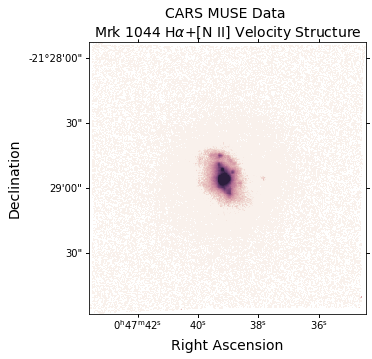

In [302]:
image = data[ha_channel,:,:]

image[image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


We can do a *very* rough continuum subtraction, too. We know, for example, that 200 spectral channels blueward of the H$\alpha$ peak will always land in a line-free region of the continuum. We're only showing one channel at a time, so let's just subtract this smooth continuum-only channel from every frame of our movie, i.e.: 

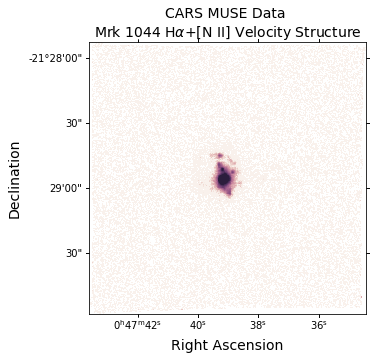

In [303]:
cont_sub_image = data[ha_channel,:,:] - data[ha_channel - 200,:,:]


cont_sub_image[cont_sub_image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


Not bad for a cheap continuum subtraction, right?! 

#### Now, we can make the movie! 

Hopefully the stuff below is pretty straightforward. Again, let me know if you don't understand something!

In [304]:
### How long do you want each movie? 
channels_to_show = 30 # <-- Change me
####################################

movie_start = ha_channel - channels_to_show
movie_end = ha_channel + channels_to_show


slices_of_interest = np.arange(movie_start, movie_end, 1)
png_files = []

# Clean the temporary movie directory first
# If you don't remove all "old" movie frames, your gif is gonna be messed up. 
for f in glob.glob(temp_movie_dir + "*.png"):
    os.remove(f)

for i, slice in enumerate(slices_of_interest):
    cont_sub_image = data[slice,:,:] - data[ha_channel - 200,:,:]
    cont_sub_image[cont_sub_image == 0] = np.nan
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(projection=wcs)
    ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
    ax.coords[1].set_axislabel('Declination', fontsize=fontsize)
    ax.set_title(r'CARS: Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=12)
    cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
    cmap.set_bad('white',1)
    frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')
    fig.savefig('movie/' + '{}'.format(i) + '.png', bbox_inches='tight', dpi=100, pad_inches=0)
    png_files.append('movie/' + '{}'.format(i) + '.png')
    plt.close(fig) # don't spam me with a gajillion figures

In [306]:
gif_name = 'images/movie.gif'

gif_frames = []

# Remove any old GIFs you might have made
if os.path.isfile(gif_name):
    os.remove(gif_name)

for filename in png_files:
    gif_frames.append(imageio.imread(filename))

imageio.mimsave(gif_name, gif_frames)



FileNotFoundError: The directory '/Users/beckynevin/CfA_Code/CARS_data/images' does not exist

In [ ]:
import random
__counter__ = random.randint(0,2e9)

from IPython.display import HTML, display
display(HTML('<img src={}>'.format(gif_name)))

The movie should look like this: 

![Learn to make this movie](images/movie.gif)


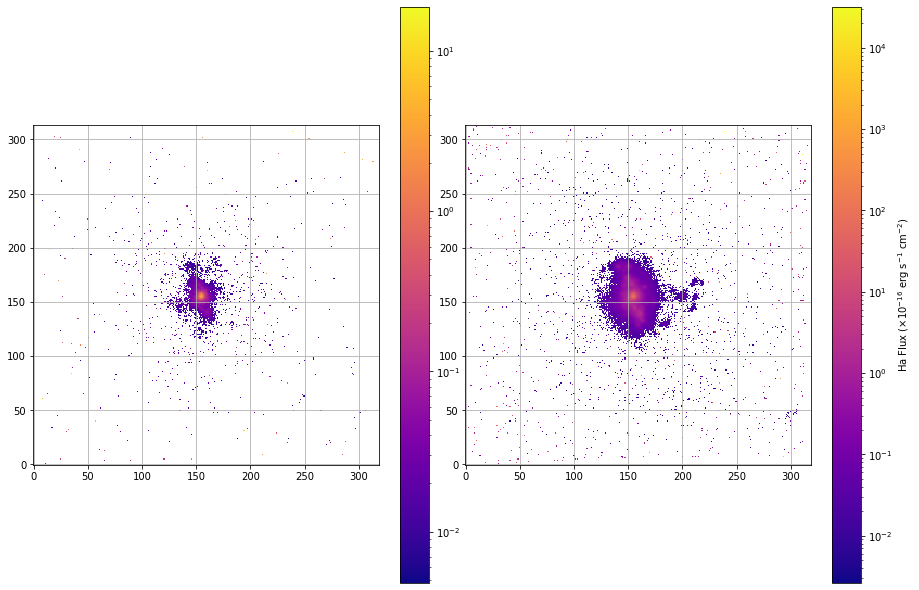

In [307]:
'''Now Becky wants to do the same thing for OIII and plot side by side with Halpha'''

gas_select = (OIII5007_flux / OIII5007_flux_err > 3)

OIII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_flux[gas_select]

fig = plt.figure()

ax = plt.axes([0,0,1,2])

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()
cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
ax.set_label('OIII')

ax1 = plt.axes([1,0,1,2])

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.set_label('Halpha')
cbar.set_label(r"Ha Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")

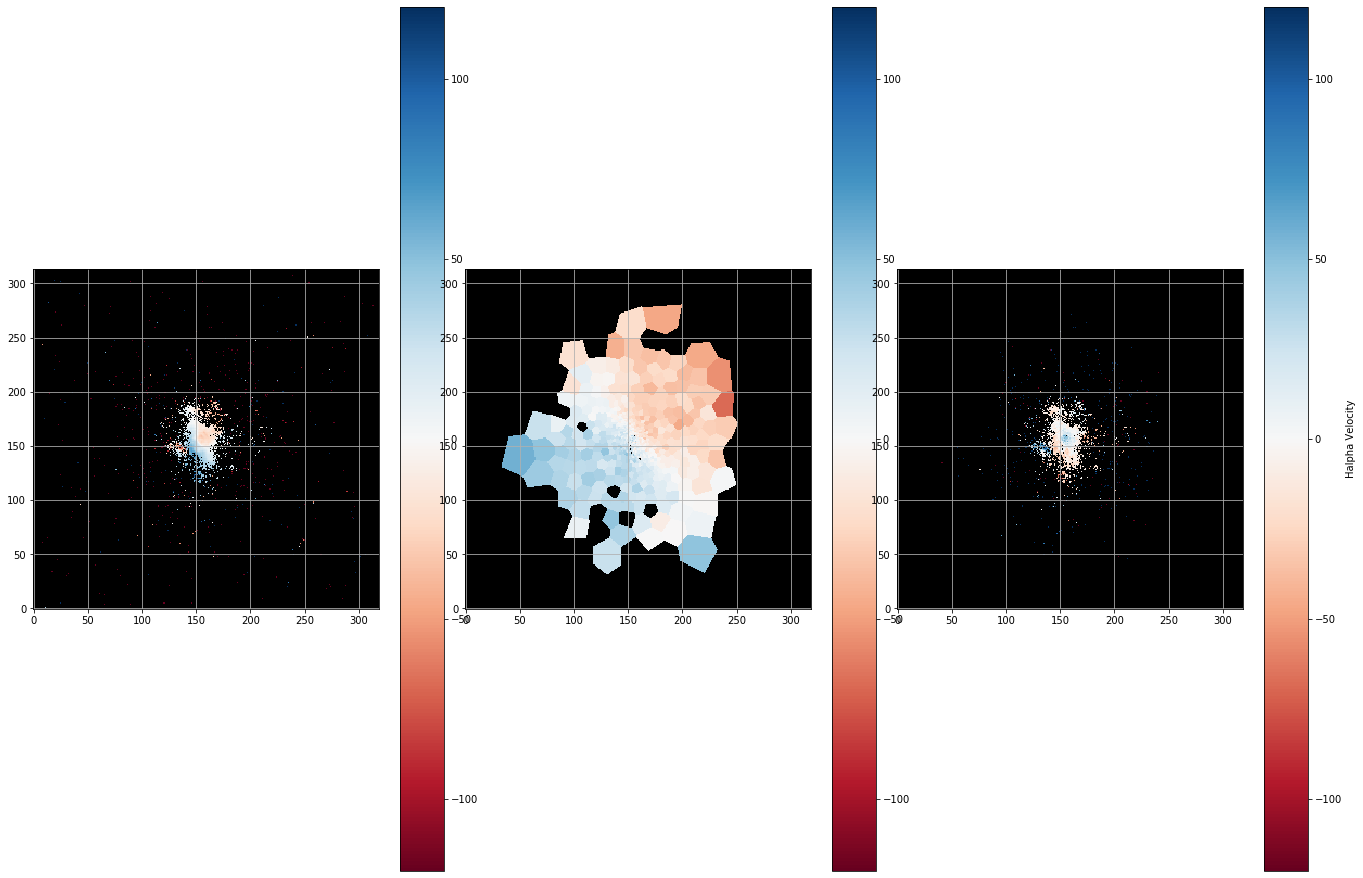

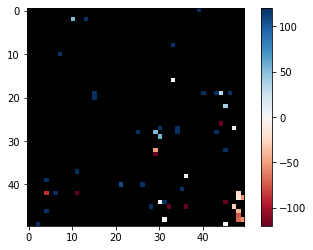

In [308]:
median_OIII_vel = np.median(OIII5007_vel[gas_select])

OIII_vel_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_vel[gas_select] - median_OIII_vel

fig = plt.figure()

ax = plt.axes([0,0,1,3])

ax.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"OIII Velocity")

ax1 = plt.axes([1,0,1,3])

ax1.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")


ax2 = plt.axes([2,0,1,3])

ax2.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map-OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")

plt.show()

plt.clf()
plt.imshow((stellar_vel_map-OIII_vel_map)[75:125,75+25:125+25], cmap=cmap, vmin=-120, vmax=120)
plt.colorbar()
plt.show()

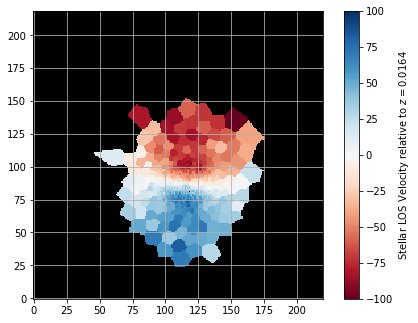

In [71]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu
cmap.set_bad('black',1) # I make the NANs black here because white is included in my colormap, encoding values near zero

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-100, vmax=100, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Stellar LOS Velocity relative to $z=0.0164$")

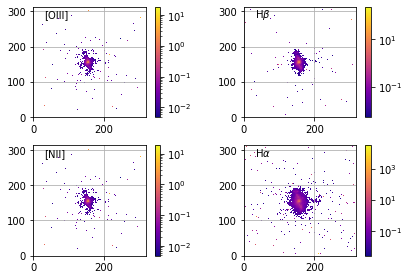

In [309]:
'''What about making BPT ratios?'''

gas_select = (NII6583_flux / NII6583_flux_err > 3)

NII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
NII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = NII6583_flux[gas_select]

gas_select = (Hb_flux / Hb_flux_err > 3)

Hb_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Hb_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Hb_flux[gas_select]


fig = plt.figure()

ax = fig.add_subplot(221)

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()

ax.annotate('[OIII]', xy=(0.1,0.9), xycoords='axes fraction')


ax1 = fig.add_subplot(222)

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Hb_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.annotate(r'H$\beta$', xy=(0.1,0.9), xycoords='axes fraction')

ax2 = fig.add_subplot(223)

ax2.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(NII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar2 = plt.colorbar()
#cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
#ax.set_label('OIII')
ax2.annotate('[NII]', xy=(0.1,0.9), xycoords='axes fraction')


ax3 = fig.add_subplot(224)

ax3.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax3.annotate(r'H$\alpha$', xy=(0.1,0.9), xycoords='axes fraction')

plt.tight_layout()
plt.show()



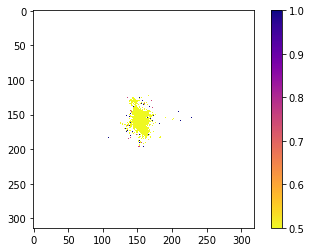

In [310]:
import math
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#Kewley: log([O III]/Hβ) < 0.61/[log([N II]/Hα) − 0.05] + 1.3
xs_kew = np.linspace(-2,0,100)
ys_kew = [0.61/(x-0.05) + 1.3 for x in xs_kew]

#Composite: 0.61/[log([N II]/Hα) − 0.47] + 1.19 > log([O III]/Hβ)
xs_comp = np.linspace(-2,0.4,100)
ys_comp = [0.61/(x-0.47) + 1.19 for x in xs_comp]

spatial_BPT = np.zeros((np.shape(Ha_flux_map)[0], np.shape(Ha_flux_map)[1]))
for i in range(np.shape(Ha_flux_map)[0]):
    for j in range(np.shape(Ha_flux_map)[1]):
        if np.isnan(OIII_flux_map[i,j]) or np.isnan(Hb_flux_map[i,j]) or np.isnan(NII_flux_map[i,j]) or np.isnan(Ha_flux_map[i,j]):
            continue
        else:
            OIII_Hbeta_ratio = math.log(OIII_flux_map[i,j]/Hb_flux_map[i,j])
            NII_Halpha_ratio = math.log(NII_flux_map[i,j]/Ha_flux_map[i,j])
            
            if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.05)+1.3):#Then it is an AGN
                spatial_BPT[i,j]=1.0
            else:
                if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.47)+1.19):#Then its a composite
                    spatial_BPT[i,j]=0.75
                else:#SF
                    spatial_BPT[i,j]=0.5
                    
spatial_BPT_ma = np.ma.masked_where(spatial_BPT==0,spatial_BPT)

plt.clf()
plt.imshow(np.flipud(spatial_BPT_ma), cmap='plasma_r')
plt.colorbar()
plt.show()

In [ ]:
'''It might be nice to look at this for a bunch of different galaxies, I for one an surprised it is not dominated by AGN-like emission'''


In [109]:
'''It also might be nice to use the shock diagnostics from Comerford et al. 2017'''

'''Cannot do this because we do not have 4363 :('''

NameError: name 'OIII4363_flux' is not defined

### How to look at the emission and continuum model
[Return to Top](#contents)

This section takes a peek at how to use the eline and continuum models in concert with the full cube.

One thing we do is to looka t if subtracting off the best fit continuum and emission lines for each spaxel leaves any significant residuals.

In [30]:
cont_model = fits.open('/Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/'+galaxy+'.cont_model.fits')
eline_model = fits.open('/Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/'+galaxy+'.eline_model.fits')

(3682, 314, 319)


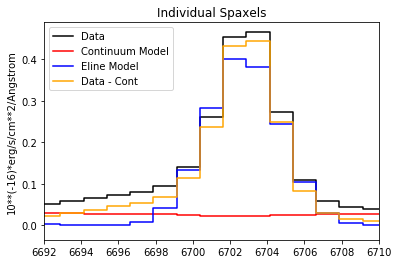

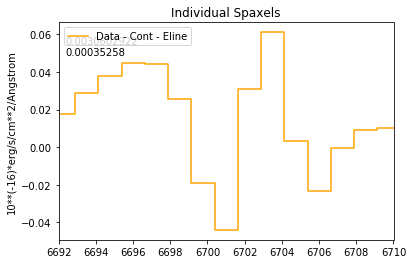

In [176]:
print(np.shape(cont_model[0].data))

#wave_range = [4950,4975] #hbeta
wave_range = [6692, 6710]

plt.clf()
plt.step(wav, hdulist[0].data[:,150,150], color='black', label = 'Data')
plt.step(wav, cont_model[0].data[:,150,150], color='red', label = 'Continuum Model')
plt.step(wav, eline_model[0].data[:,150,150], color='blue', label = 'Eline Model')

plt.step(wav, hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150], color='orange', label = 'Data - Cont')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim(wave_range)
#plt.xlim([6000,7000])
plt.legend()
plt.show()


plt.clf()

plt.step(wav, hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150], 
         color='orange', label = 'Data - Cont - Eline')
plt.annotate(str(np.std(hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150])),
             xy = (0.02,0.9), xycoords='axes fraction')
plt.annotate(str(np.mean(hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150])),
             xy = (0.02,0.85), xycoords='axes fraction')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim(wave_range)
#plt.xlim([6000,7000])
plt.legend()
plt.show()

Filename: /Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/HE0045-2145.cont_model.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      44   (319, 314, 3682)   float32   
  1  BADPIX        1 ImageHDU         9   (319, 314, 3682)   uint8   
  2  NORMALIZE     1 ImageHDU         9   (319, 314, 3682)   float64   
None
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                    8 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  319                                                  NAXIS2  =                  314                                                  NAXIS3  =                 3682                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups     

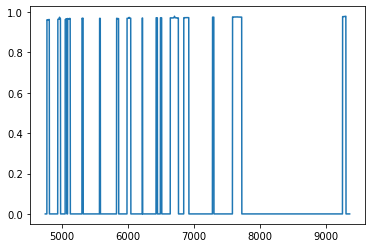

In [89]:
print(cont_model.info())
print(cont_model[1].header)
plt.plot(wav,cont_model[1].data[:,150,150]*(1-cont_model[0].data[:,150,150]))
plt.show()

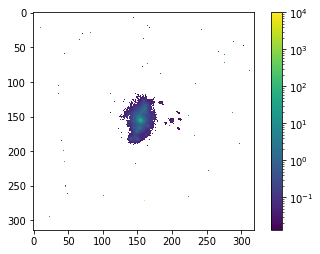

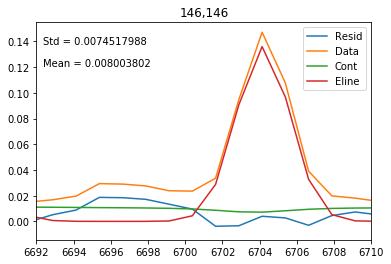

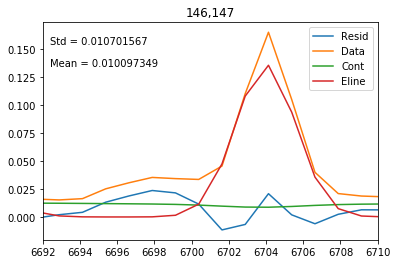

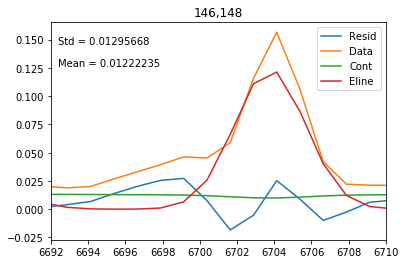

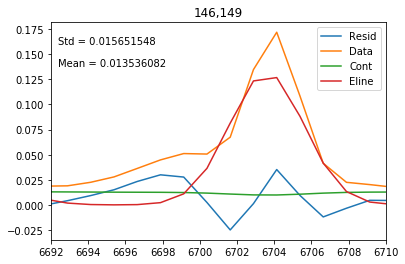

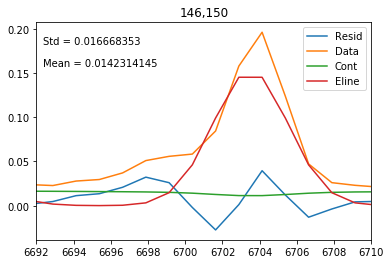

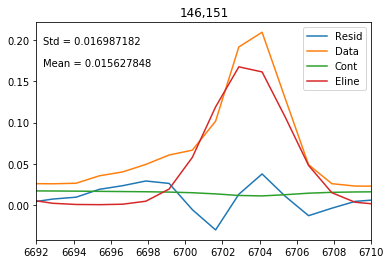

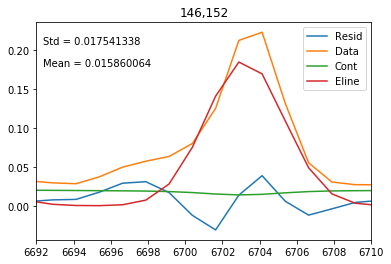

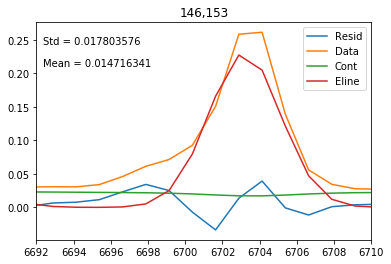

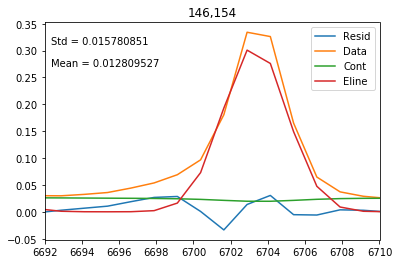

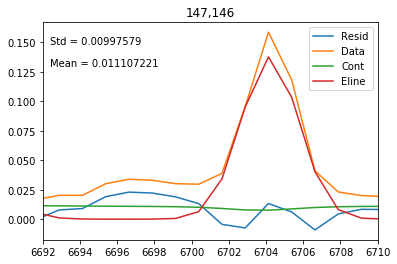

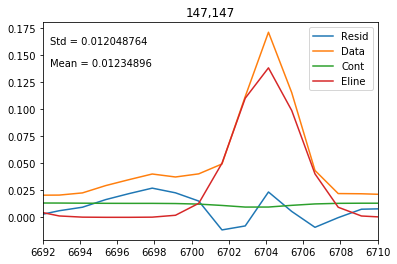

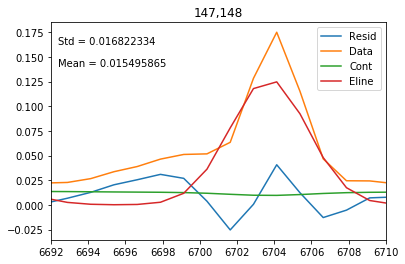

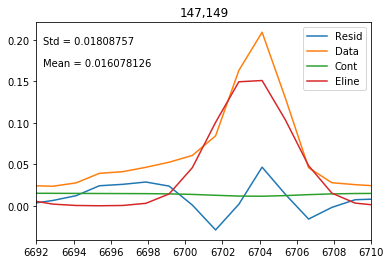

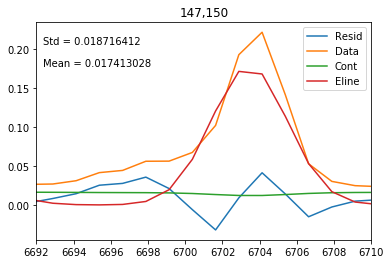

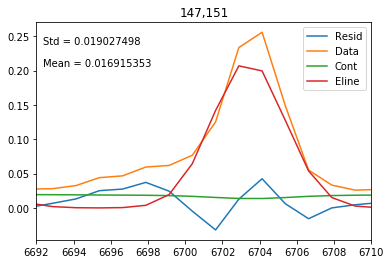

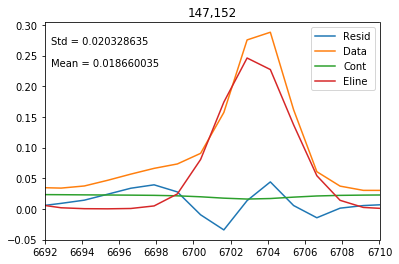

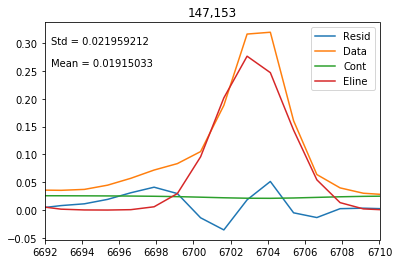

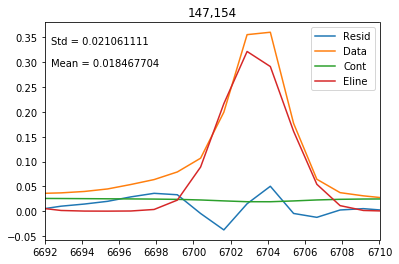

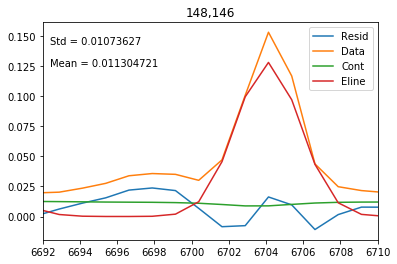

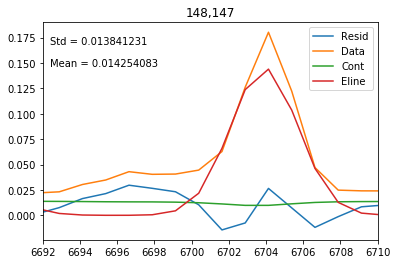

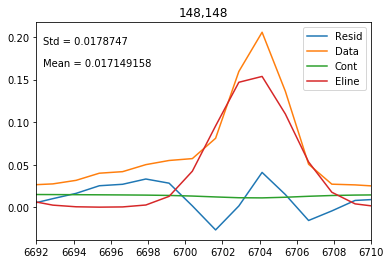

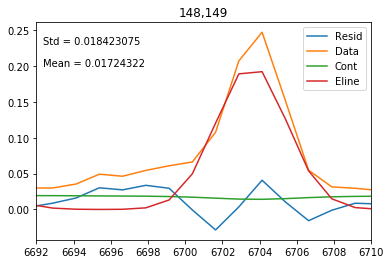

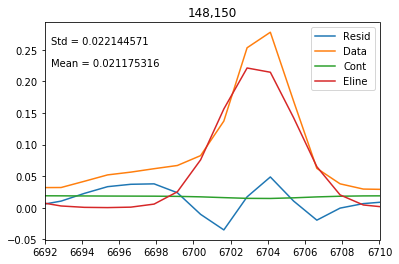

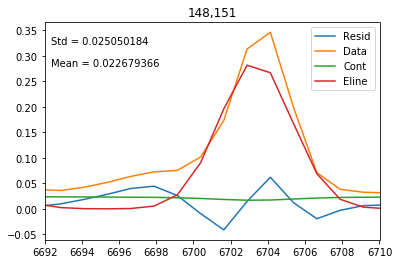

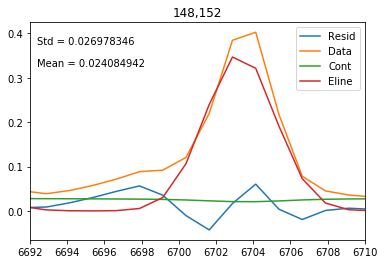

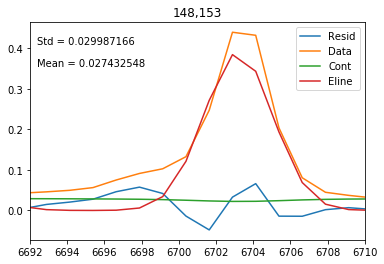

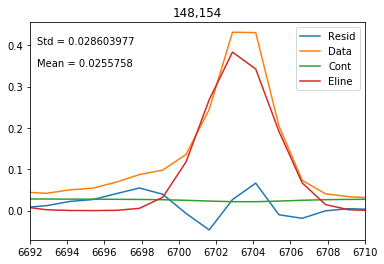

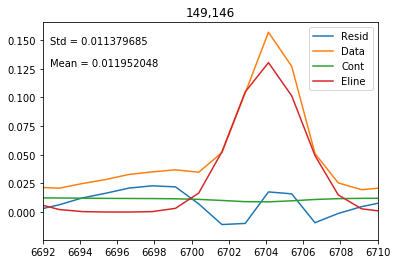

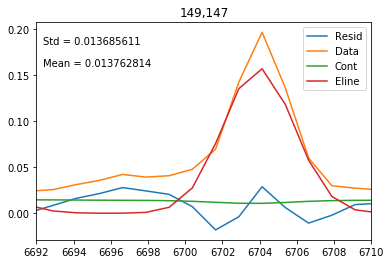

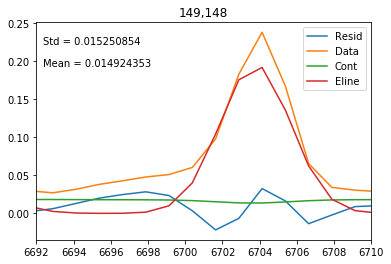

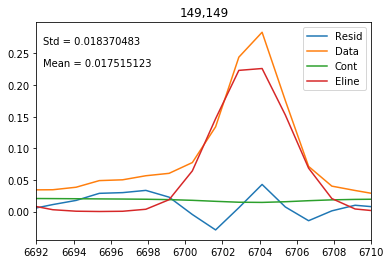

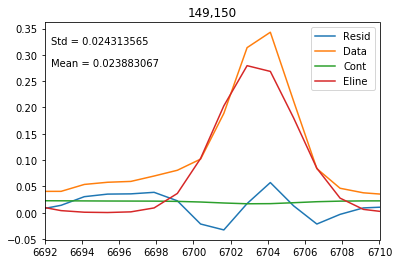

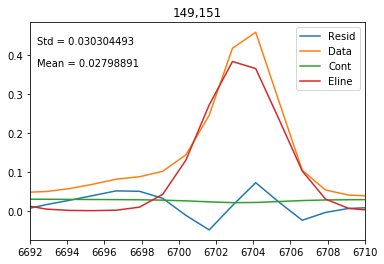

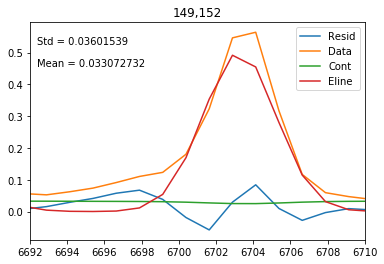

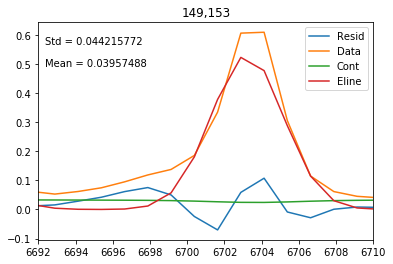

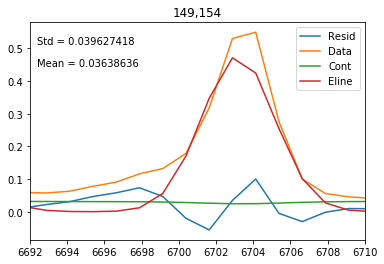

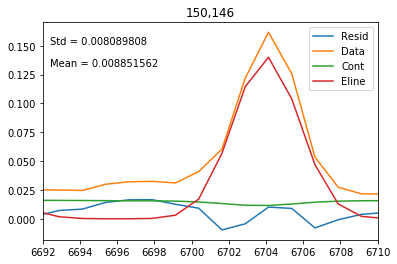

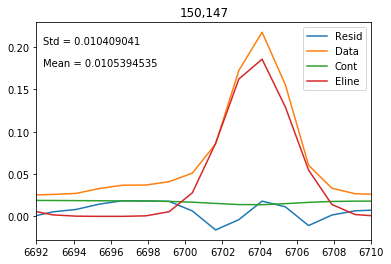

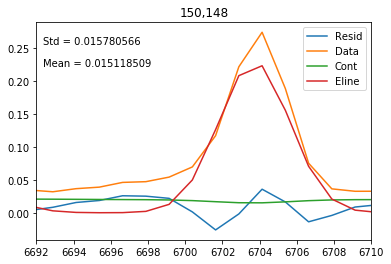

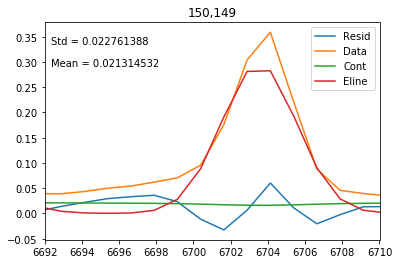

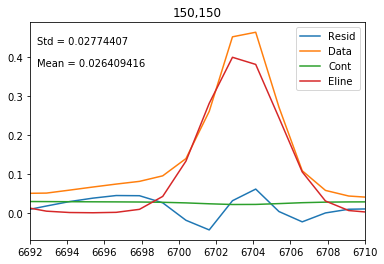

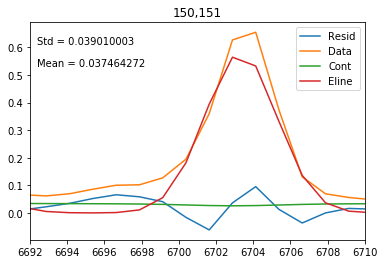

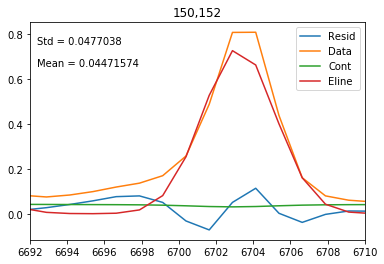

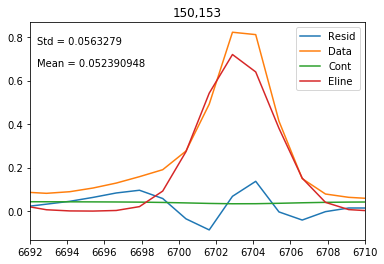

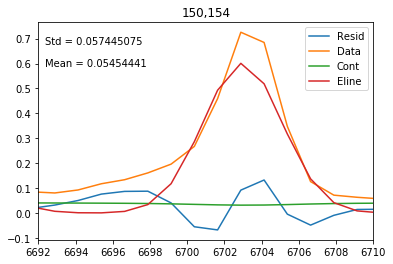

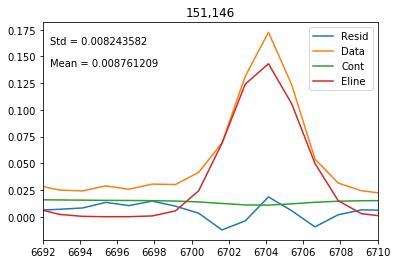

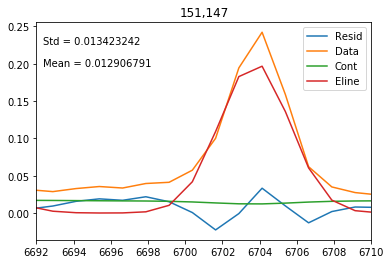

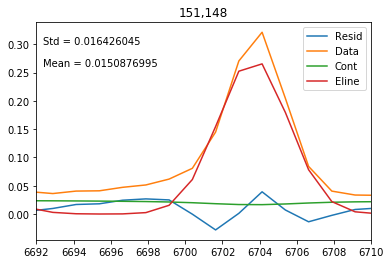

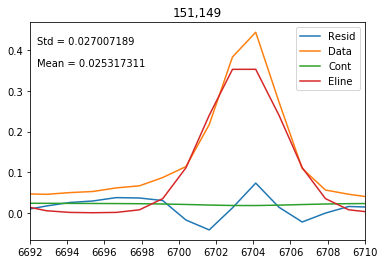

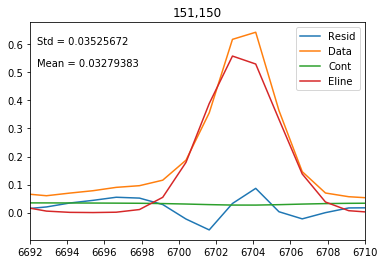

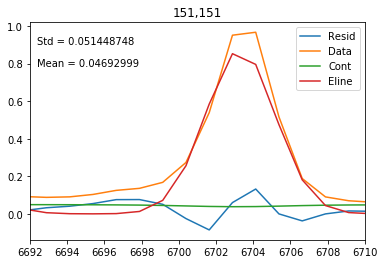

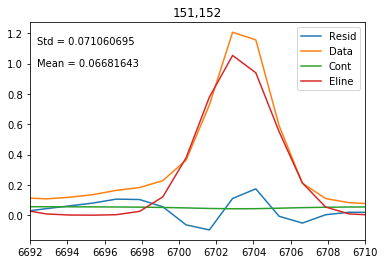

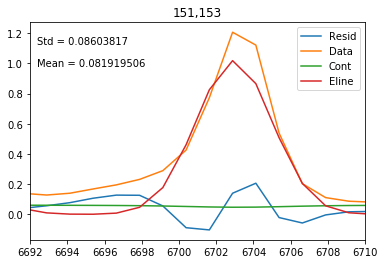

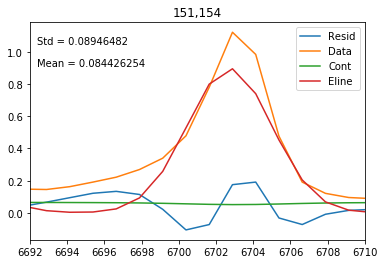

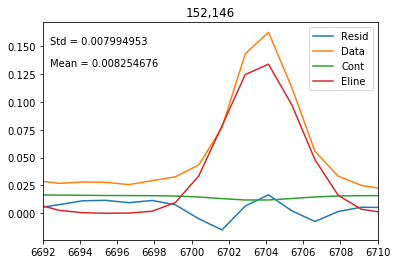

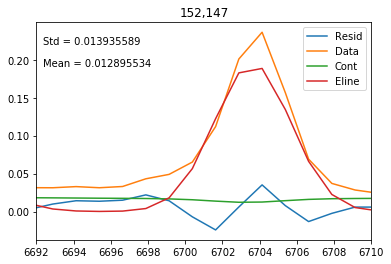

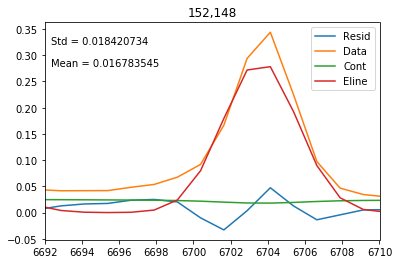

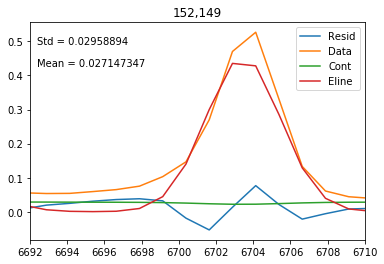

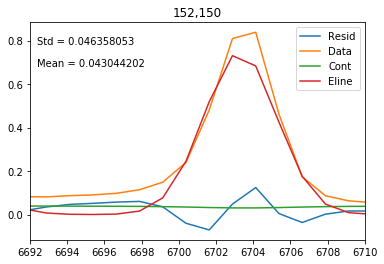

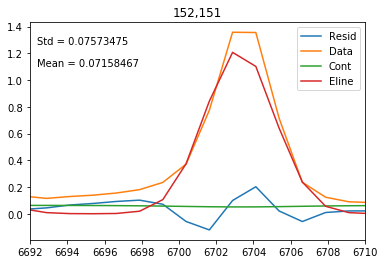

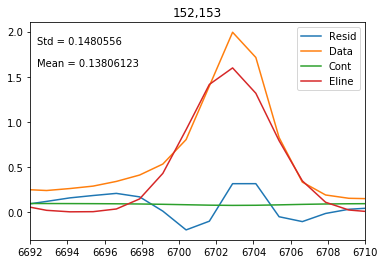

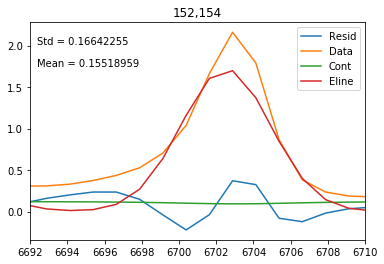

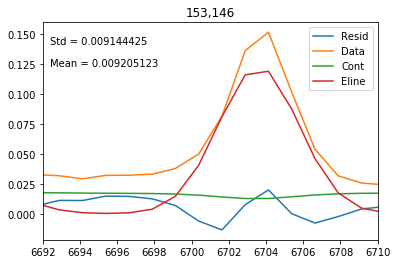

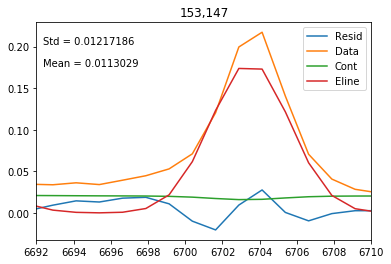

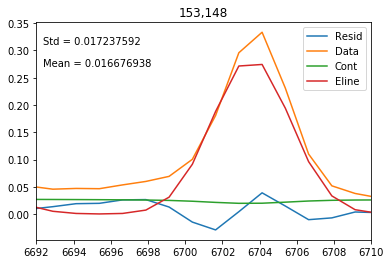

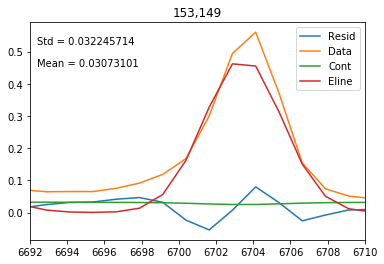

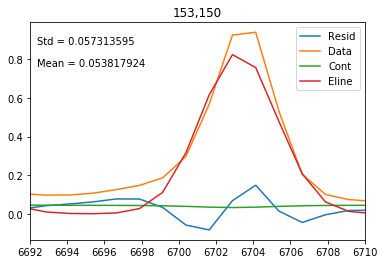

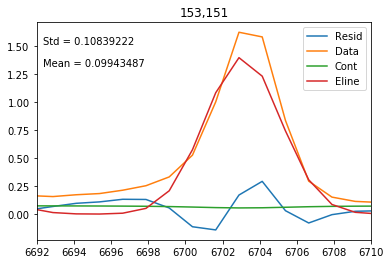

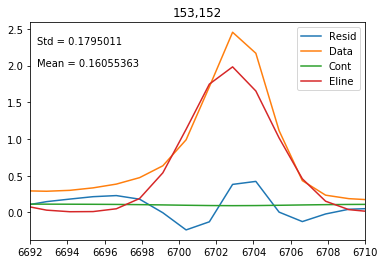

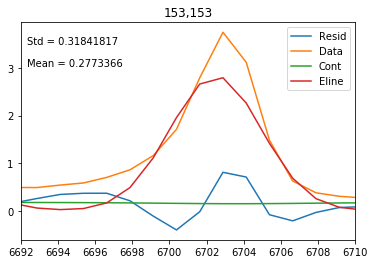

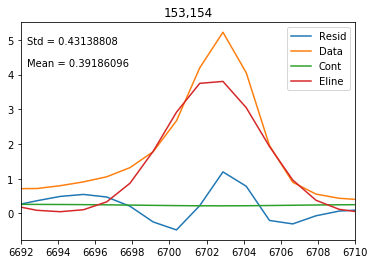

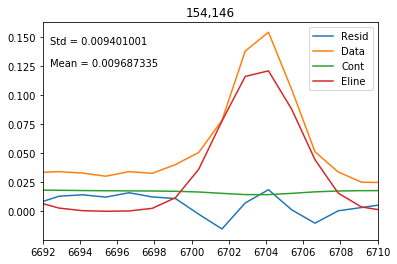

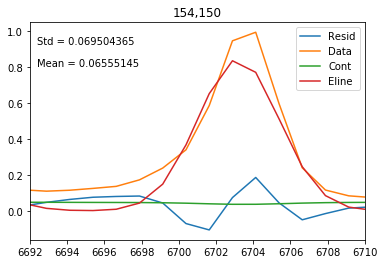

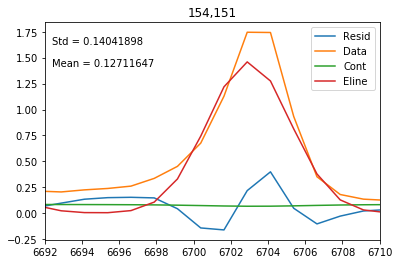

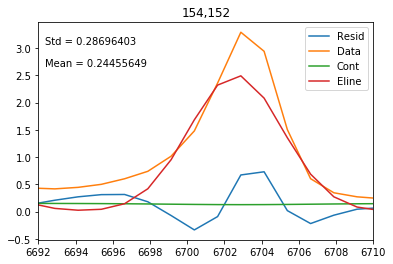

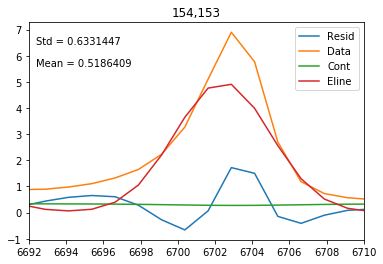

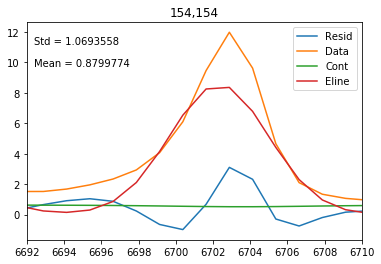

In [177]:
resid_std = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
resid_mean = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
resid_gaussian = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
wave_range = [6692, 6710]#[4950,4975]
index_1 = find_nearest(wav,wave_range[0])[0]
index_2 = find_nearest(wav,wave_range[1])[0]
#return idx, array[idx]

gas_select = (Ha_flux / Ha_flux_err > 10)
Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_flux[gas_select]

plt.clf()
plt.imshow(Ha_flux_map, norm = matplotlib.colors.LogNorm())

plt.colorbar()
plt.show()




for i in range(np.shape(hdulist[0].data)[1]):
    for j in range(np.shape(hdulist[0].data)[2]):
        if np.isnan(Ha_flux_map[i,j]):# or abs(150 - i) > 2 or abs(150 - j) > 2:
            continue
        residual = hdulist[0].data[:,i,j] -cont_model[0].data[:,i,j] -eline_model[0].data[:,i,j]
        OG = hdulist[0].data[:,i,j]
        
        cont = cont_model[0].data[:,i,j]
        eline = eline_model[0].data[:,i,j]
        
        if abs(150 - i) < 5 and abs(150 - j) < 5:
        #Ha_flux_map[i,j] > 10**2:
            min_here = min(OG[index_1:index_2])
            max_here = max(OG[index_1:index_2])
            plt.clf()
            plt.plot(wav, residual, label='Resid')
            plt.plot(wav, OG, label='Data')
            plt.plot(wav, cont, label='Cont')
            plt.plot(wav, eline, label='Eline')

            plt.legend()
            plt.annotate('Std = '+str(np.std(residual[index_1:index_2])), 
                         xy=(0.02,0.9), xycoords='axes fraction')

            plt.annotate('Mean = '+str(np.mean(abs(residual[index_1:index_2]))), 
                         xy=(0.02,0.8), xycoords='axes fraction')
            plt.title(str(i)+','+str(j))
            plt.xlim(wave_range)
            #plt.ylim([min_here, max_here])
            plt.show()

        '''plt.clf()
        plt.plot(wav[wave_range[0]:wave_range[1]], residual[wave_range[0]:wave_range[1]])
        plt.show()'''
        resid_std[i,j] = np.std(residual[index_1:index_2])
        resid_mean[i,j] = np.mean(abs(residual[index_1:index_2]))
        
        
        # Maybe also fit a Gaussian tot he residuals?
        # Naw it looks too difficult :()
        
        
        

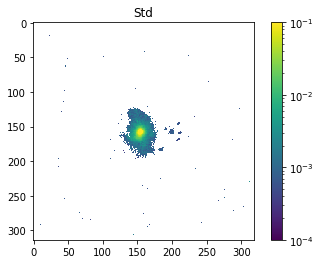

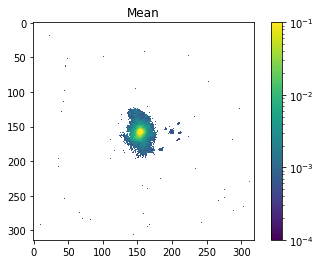

In [204]:
# This is for Hbeta

plt.clf()
plt.imshow(np.flipud(resid_std),  norm = matplotlib.colors.LogNorm(), vmin = 10**-4, vmax=10**(-1))
plt.colorbar()
plt.title('Std')
plt.show()

plt.clf()
plt.imshow(np.flipud(resid_mean), norm = matplotlib.colors.LogNorm(), vmin = 10**-4, vmax=10**(-1))
plt.colorbar()
plt.title('Mean')
plt.show()